# **Proposta de Trabalho - Mineração de dados**

### **Professores:** Wagner Meira Jr./Pedro Calais
### **Alunos:** Raul Araju e Gabriel Lima Nunes
### **Matrícula** 2021032110 e 2021032048


### **Tema:** Precificação do Seguro de Saúde nos Estados Unidos
### **Base de dados:** https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv


**Todas as células que não possuem comentários que indiquem ter sido criadas manualmente ou alteradas, foram geradas através de iterações com o ChatGPT, com mudanças muito pequenas como nomes de variáveis.**

## **ChatGPT Links**

**Business Understanding** 

**Data Understanding:** https://chat.openai.com/share/d907147a-f415-496a-ae27-d13cdea03d26

**Data Preparation:** https://chat.openai.com/share/c1cf2fb1-b305-4780-a653-57d9fc22fafa

**Modeling:** https://chat.openai.com/share/aab2db92-a514-47de-8a45-08c41f64df20

**Evaluation:** https://chat.openai.com/share/13b37e5b-2620-4bdb-bd7f-6426daafc4ab


In [287]:
#Bibliotecas usadas no projeto
# INICIO CÓDIGO MANUAL
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
# FIM CÓDIGO MANUAL

# **Introdução**

## **2. Data understanding (Entendimento dos dados)**


#### Carregar CSV

In [288]:
# INICIO CÓDIGO MANUAL
#Carregando a base de dados
df  = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df_ = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
#df= pd.read_csv("/home/grad/ccomp/21/nuneslima/Downloads/insurance.csv")
# FIM CÓDIGO MANUAL

#### Explorar o Dataframe


In [289]:
# FASE 3
df_.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [290]:
# INICIO CÓDIGO MANUAL
df.head()
# FIM CÓDIGO MANUAL

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [291]:
# INICIO CÓDIGO MANUAL
# Display basic statistics of the numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())
# FIM CÓDIGO MANUAL

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


#### Histogramas para cada coluna numérica

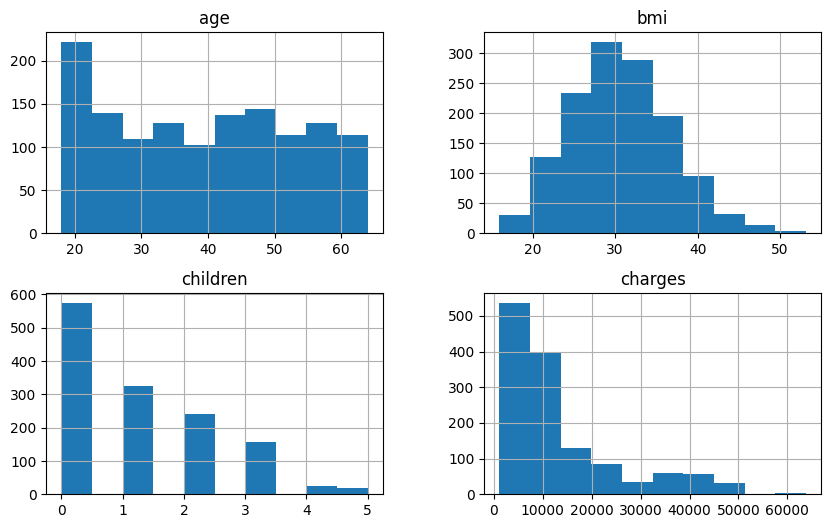

In [292]:
# FASE 3
# Plotting histograms for all numerical columns in the DataFrame
df_.hist(bins=10, figsize=(10, 6))
plt.show()

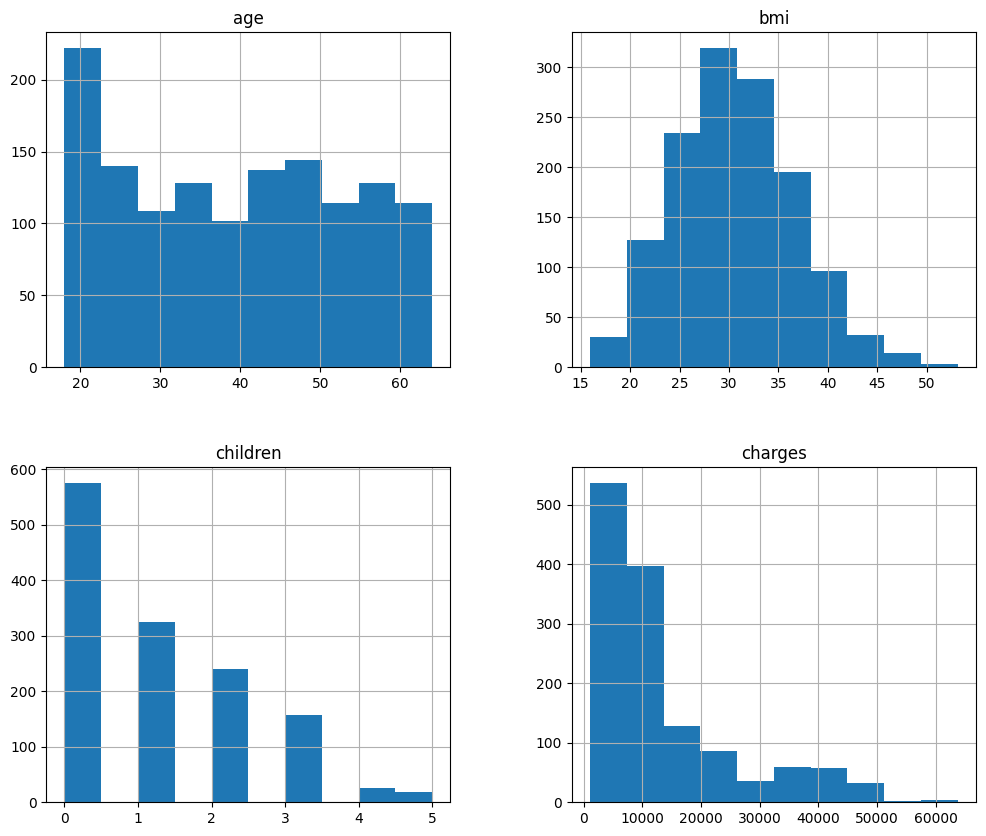

In [293]:
# Plot histograms for numerical columns
df.hist(figsize=(12, 10))
plt.show()

#### Distribuição de Colunas Binárias

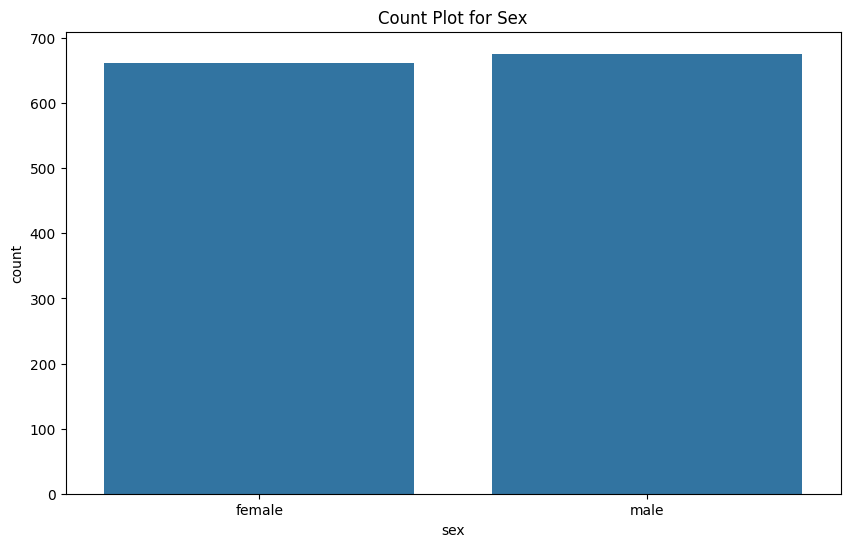

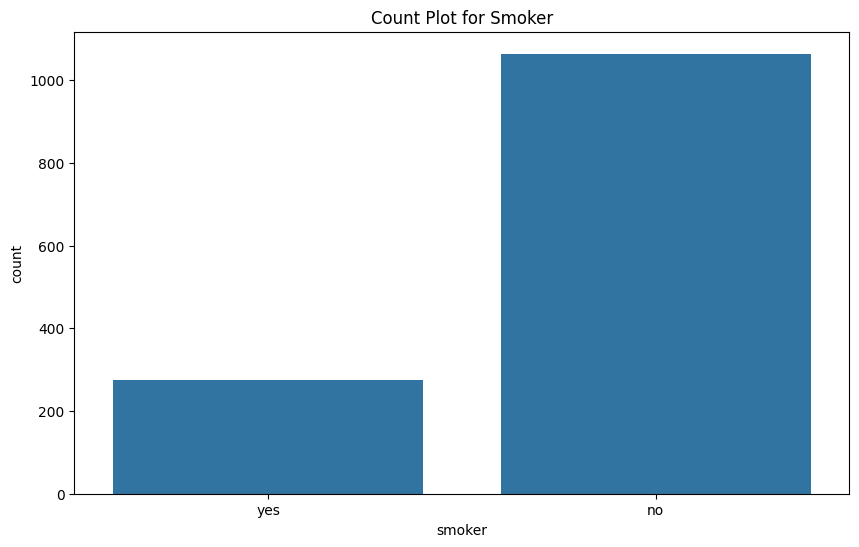

In [294]:
# FASE 3
# Count plot for the 'sex' column
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=df_)
plt.title('Count Plot for Sex')
plt.show()

# Count plot for the 'smoker' column
plt.figure(figsize=(10, 6))
sns.countplot(x='smoker', data=df_)
plt.title('Count Plot for Smoker')
plt.show()


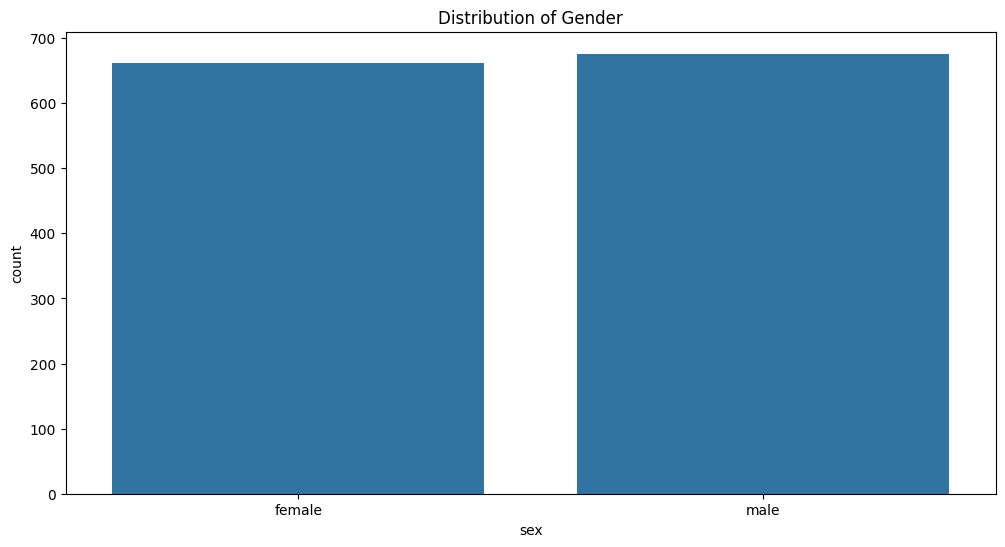

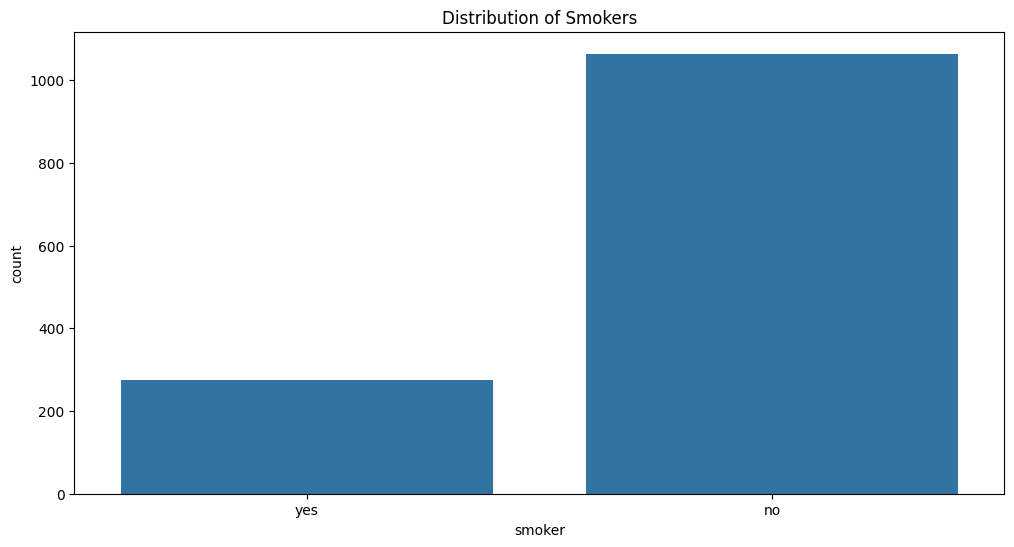

In [295]:
# Countplot for 'sex' and 'smoker'
plt.figure(figsize=(12, 6))
sns.countplot(x='sex', data=df)
plt.title('Distribution of Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='smoker', data=df)
plt.title('Distribution of Smokers')
plt.show()


#### Relação entre atributos

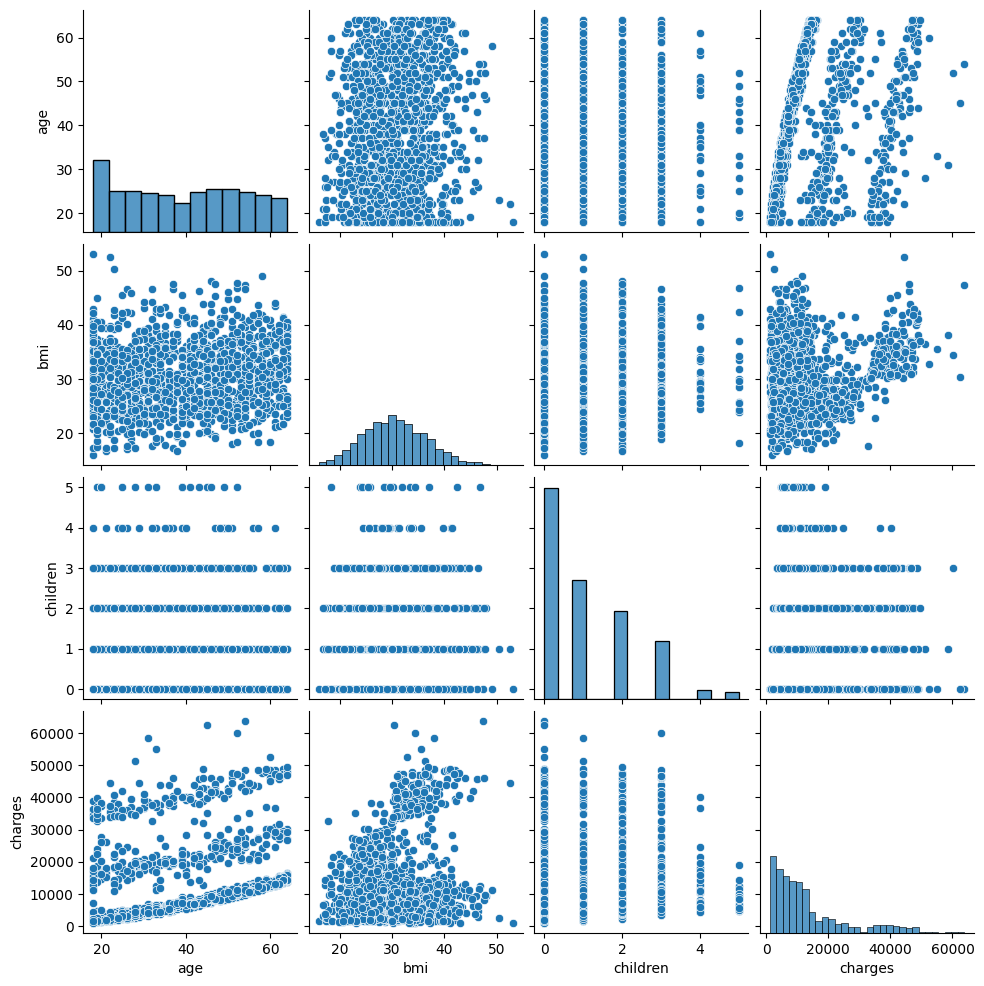

In [296]:
# FASE 3
sns.pairplot(df_)
plt.show()

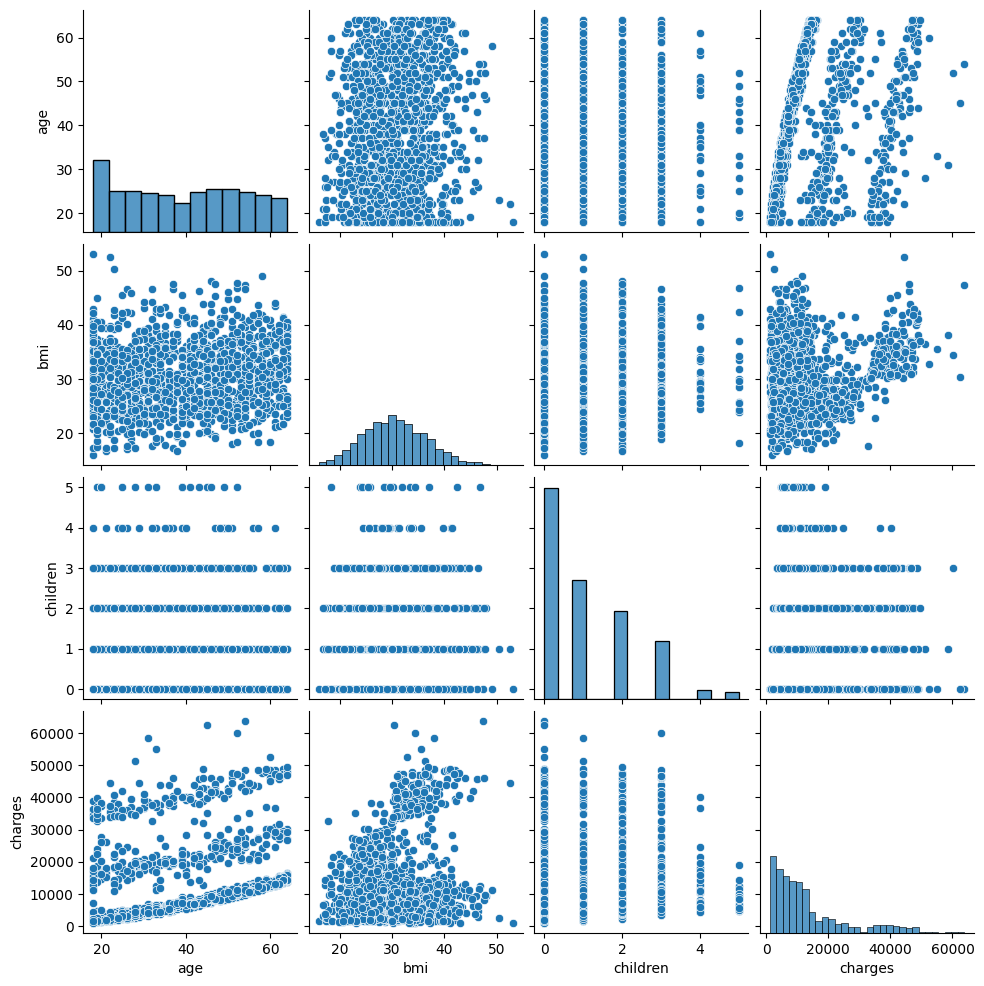

In [297]:
sns.pairplot(df)
plt.show()

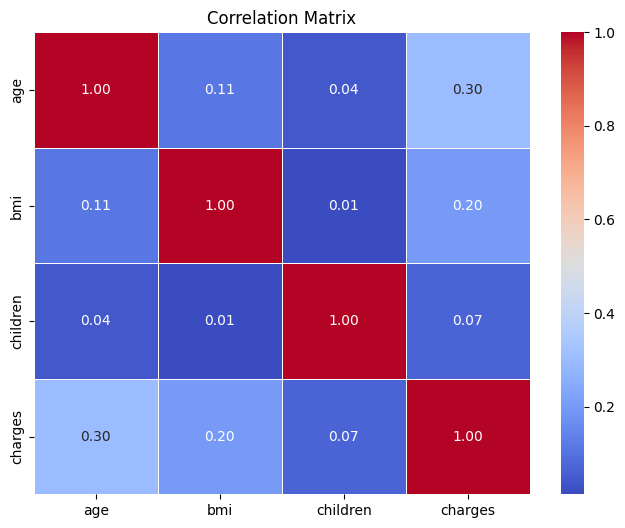

In [298]:
# FASE 3
# Select only numeric columns
numeric_columns = df_.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

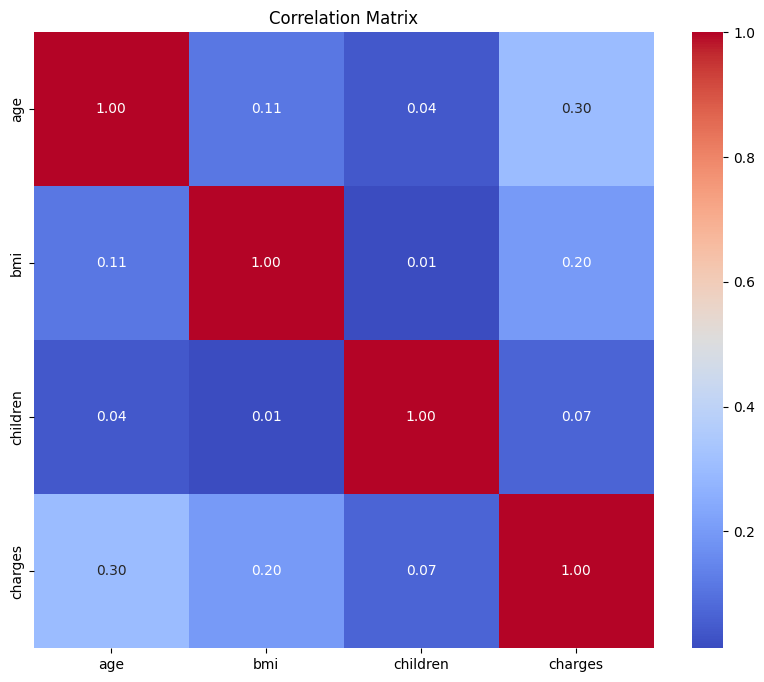

In [299]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns=['sex', 'smoker', 'region']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### Boxplots para atributos numéricos

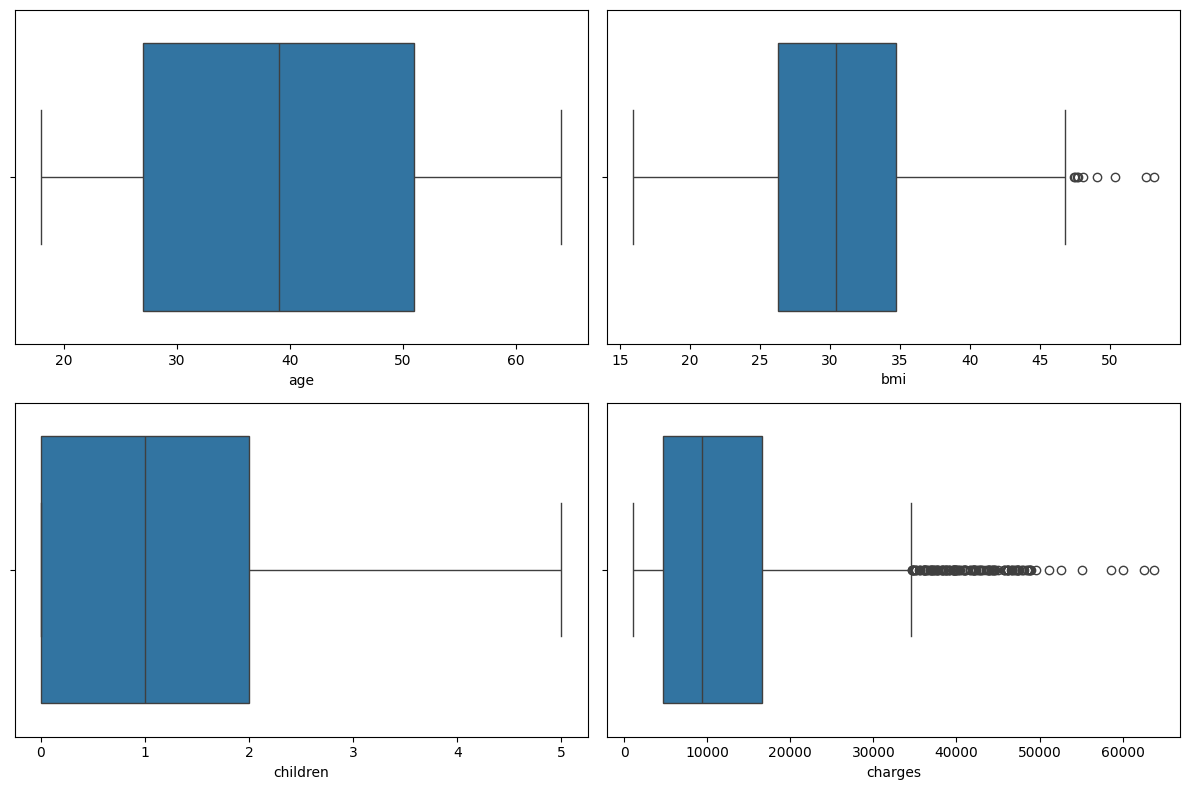

In [300]:
# Fase 3
plt.figure(figsize=(12, 8))

# Boxplot for 'age'
plt.subplot(2, 2, 1)
sns.boxplot(x='age', data=df_)

# Boxplot for 'bmi'
plt.subplot(2, 2, 2)
sns.boxplot(x='bmi', data=df_)

# Boxplot for 'children'
plt.subplot(2, 2, 3)
sns.boxplot(x='children', data=df_)

# Boxplot for 'charges'
plt.subplot(2, 2, 4)
sns.boxplot(x='charges', data=df_)

plt.tight_layout()
plt.show()

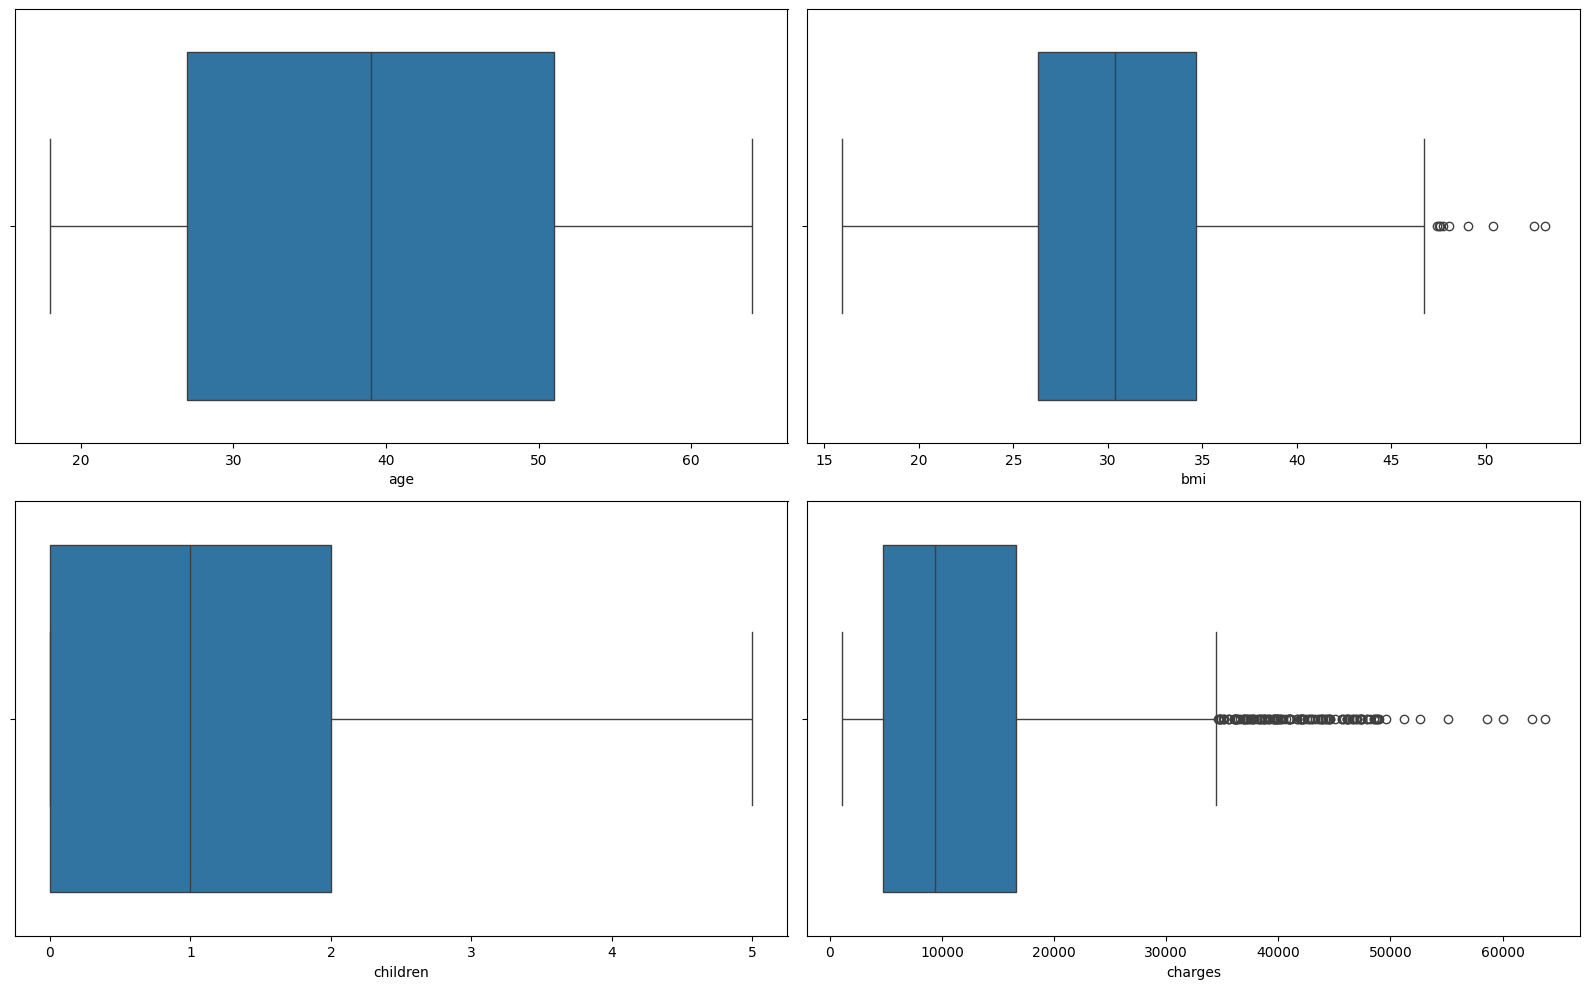

In [301]:
# Create box plots for numerical columns with potential outliers
plt.figure(figsize=(16, 10))

# Box plot for 'age'
plt.subplot(2, 2, 1)
sns.boxplot(x='age', data=df)

# Box plot for 'bmi'
plt.subplot(2, 2, 2)
sns.boxplot(x='bmi', data=df)

# Box plot for 'children'
plt.subplot(2, 2, 3)
sns.boxplot(x='children', data=df)

# Box plot for 'charges'
plt.subplot(2, 2, 4)
sns.boxplot(x='charges', data=df)

plt.tight_layout()
plt.show()


#### Adição de coluna com a categoria do BMI

In [302]:
# Define custom BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Healthy Weight'
    elif 24.9 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

# Create 'bmi_category' column
df_['bmi_category'] = df_['bmi'].apply(categorize_bmi)



In [303]:
# Function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Healthy Weight'
    elif 24.9 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

# Apply the function to create a new 'bmi_category' column
df['bmi_category'] = df['bmi'].apply(categorize_bmi)

In [304]:
df

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,Healthy Weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obesity
1334,18,female,31.920,0,no,northeast,2205.98080,Obesity
1335,18,female,36.850,0,no,southeast,1629.83350,Obesity
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight


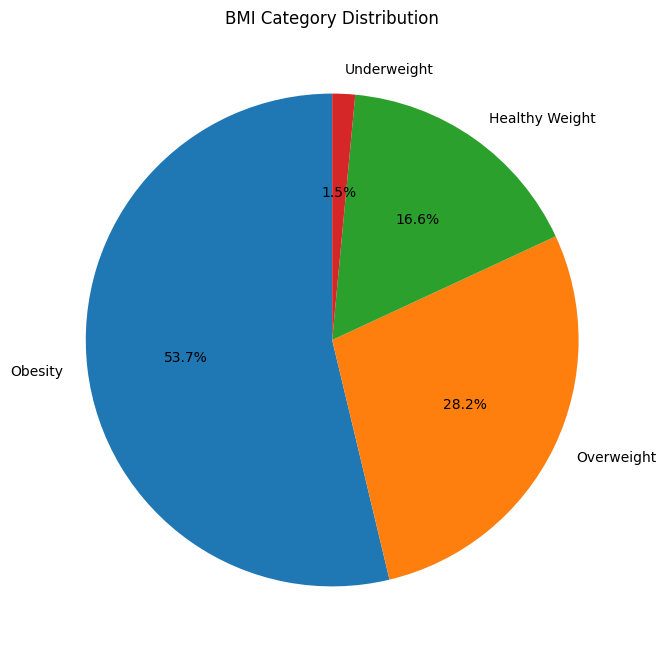

In [305]:
# Assuming df_ is your DataFrame
# Replace this with your actual DataFrame

# Plotting 'bmi_category' as a pie chart
plt.figure(figsize=(8, 8))
df_['bmi_category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('BMI Category Distribution')
plt.ylabel('')  # To remove the default ylabel
plt.show()

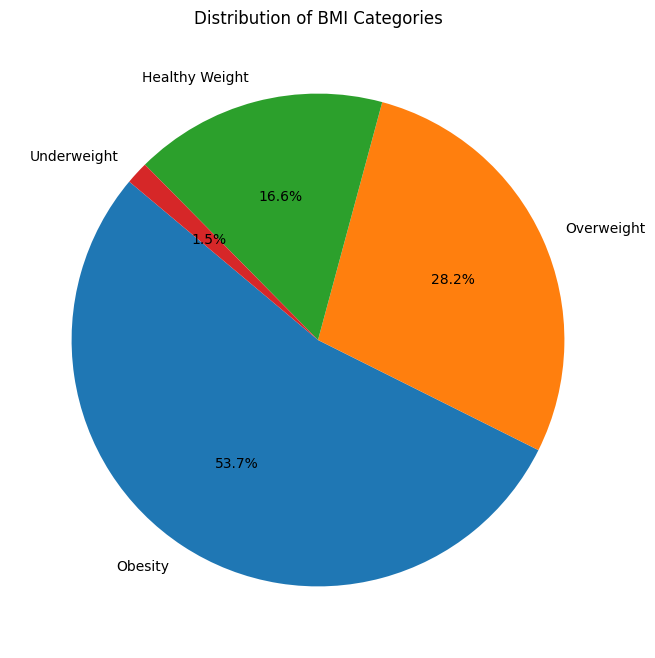

In [306]:
# INÍCIO CÓDIGO ALTERADO
plt.figure(figsize=(8, 8))
explode = (0, 0, 0, 0) 
# Count the occurrences of each BMI category
bmi_category_counts = df['bmi_category'].value_counts()

# Plot the pie chart
plt.pie(bmi_category_counts, labels=bmi_category_counts.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution of BMI Categories')
plt.show()
# FIM CÓDIGO ALTERADO

#### Relação entre diferentes atributos e o Custo do Seguro

/tmp/ipykernel_28288/894629360.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bmi_category', y='charges', data=df_, order=bmi_order, palette='Set2')


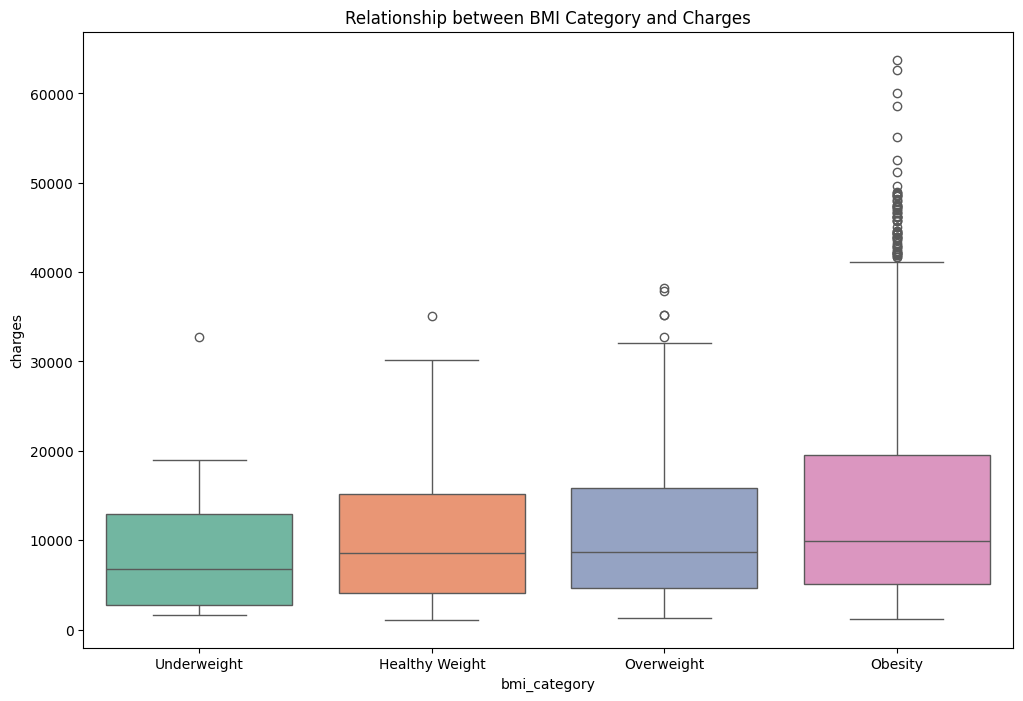

In [307]:
# FASE 3
# Define the desired order of 'bmi_category'
bmi_order = ['Underweight', 'Healthy Weight', 'Overweight', 'Obesity']

# Create a box plot with the specified order
plt.figure(figsize=(12, 8))
sns.boxplot(x='bmi_category', y='charges', data=df_, order=bmi_order, palette='Set2')
plt.title('Relationship between BMI Category and Charges')
plt.show()

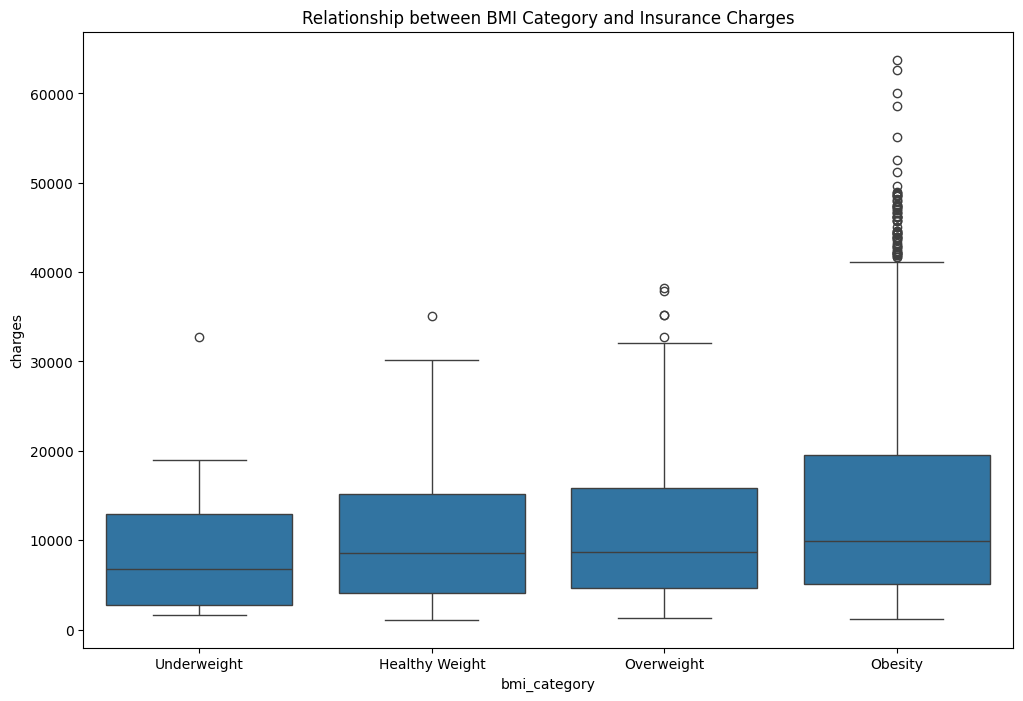

In [308]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='bmi_category', y='charges', data=df, order=['Underweight', 'Healthy Weight', 'Overweight', 'Obesity'])
plt.title('Relationship between BMI Category and Insurance Charges')
plt.show()

/tmp/ipykernel_28288/1507380589.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df_, palette='Set1')


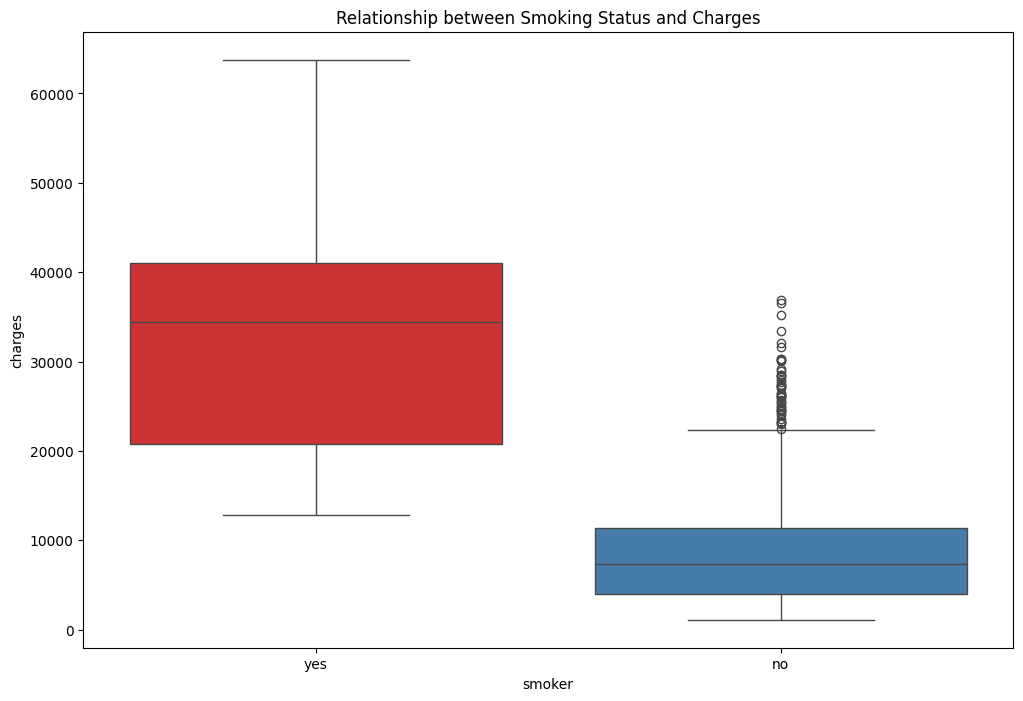

In [309]:
# FASE 3
# Create a box plot for the relationship between 'smoker' and 'charges'
plt.figure(figsize=(12, 8))
sns.boxplot(x='smoker', y='charges', data=df_, palette='Set1')
plt.title('Relationship between Smoking Status and Charges')
plt.show()

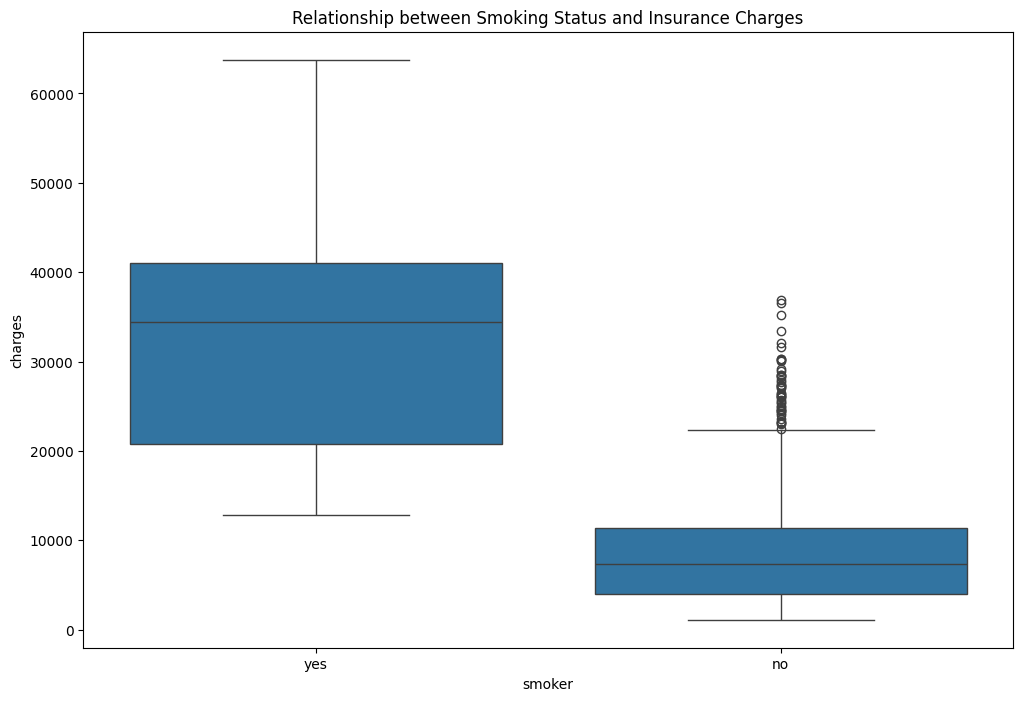

In [310]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Relationship between Smoking Status and Insurance Charges')
plt.show()

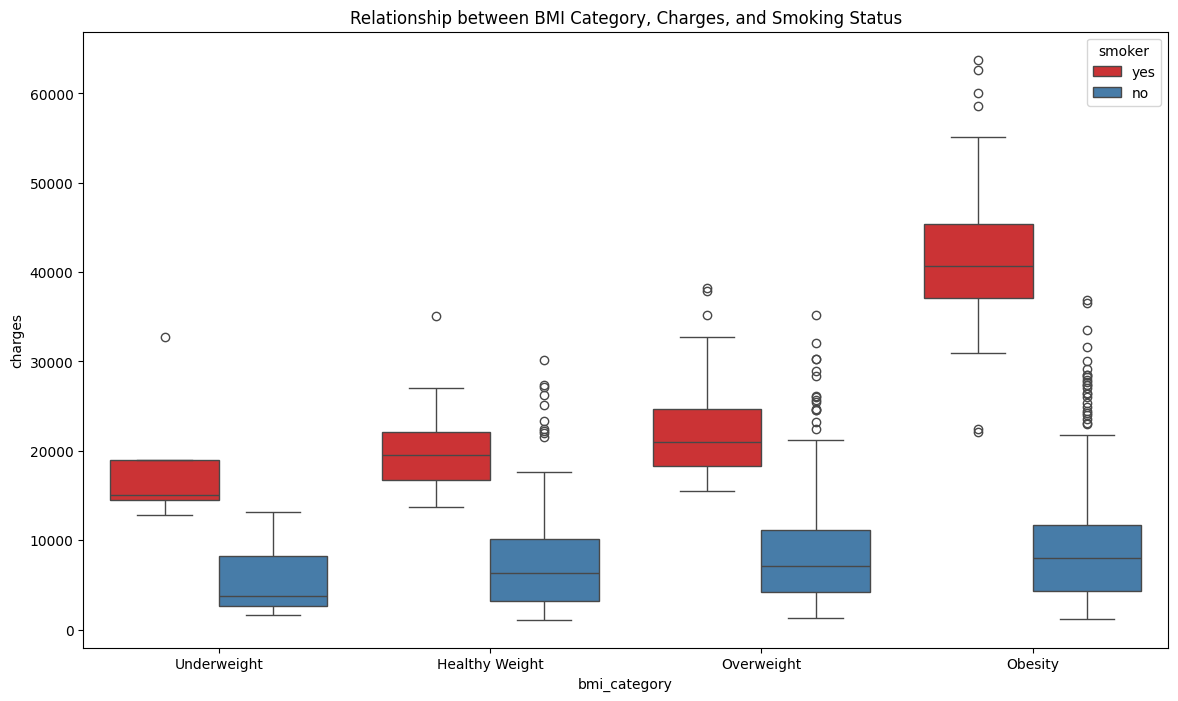

In [311]:
# FASE 3
bmi_order_reverse = ['Obesity', 'Overweight', 'Healthy Weight', 'Underweight'][::-1]

# Create a box plot with the reversed order and 'smoker' as hue
plt.figure(figsize=(14, 8))
sns.boxplot(x='bmi_category', y='charges', hue='smoker', data=df_, palette='Set1', order=bmi_order_reverse)
plt.title('Relationship between BMI Category, Charges, and Smoking Status')
plt.show()

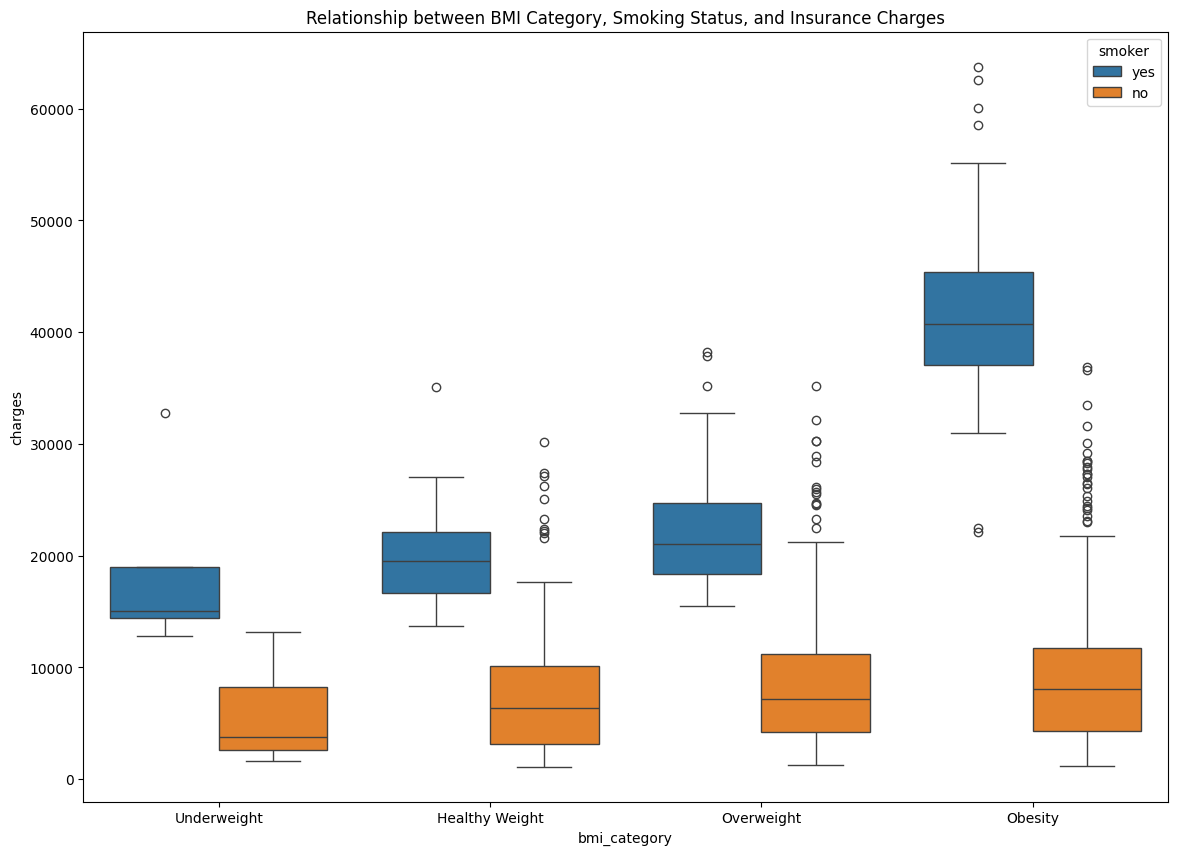

In [312]:

plt.figure(figsize=(14, 10))
sns.boxplot(x='bmi_category', y='charges', hue='smoker', data=df, order=['Underweight', 'Healthy Weight', 'Overweight', 'Obesity'])
plt.title('Relationship between BMI Category, Smoking Status, and Insurance Charges')
plt.show()


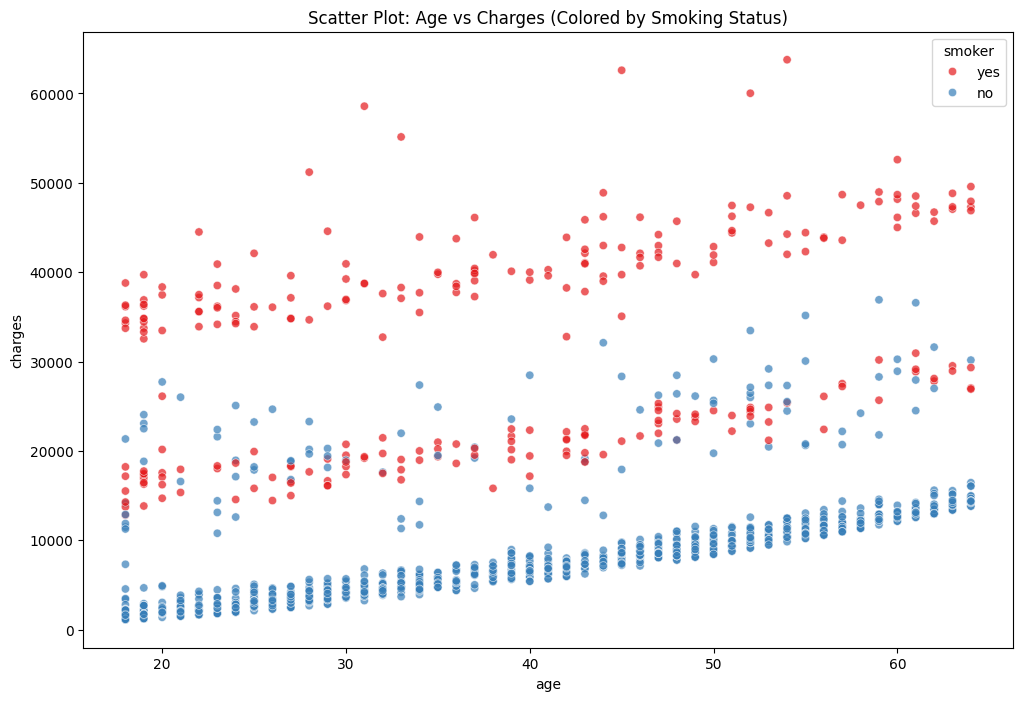

<Figure size 1200x800 with 0 Axes>

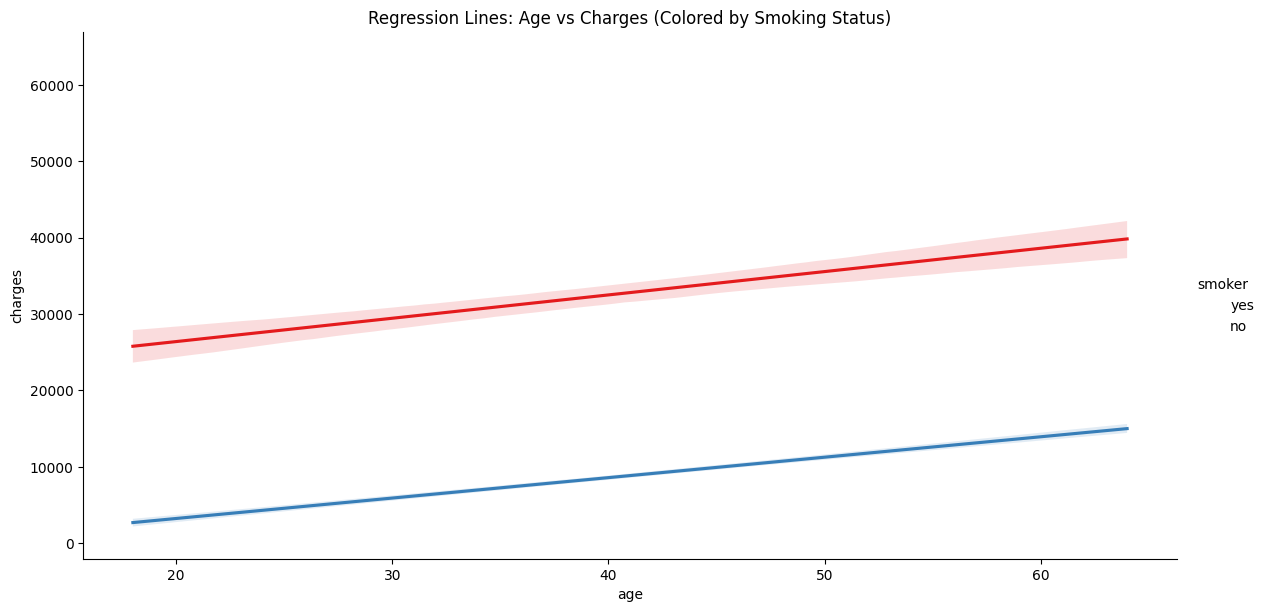

In [313]:
# FASE 3
# Create a scatter plot for the relationship between 'age' and 'charges', colored by 'smoker'
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df_, palette='Set1', alpha=0.7)
plt.title('Scatter Plot: Age vs Charges (Colored by Smoking Status)')
plt.show()
plt.figure(figsize=(12, 8))
sns.lmplot(x='age', y='charges', hue='smoker', data=df_, palette='Set1', aspect=2, height=6, scatter_kws={"s": 0})
plt.title('Regression Lines: Age vs Charges (Colored by Smoking Status)')
plt.show()

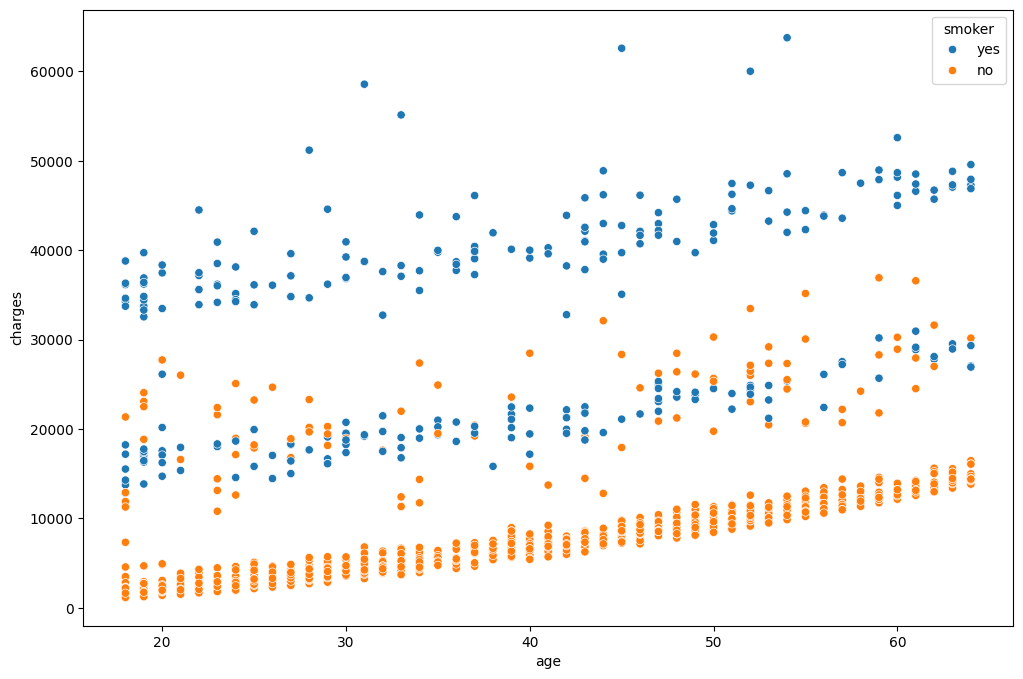

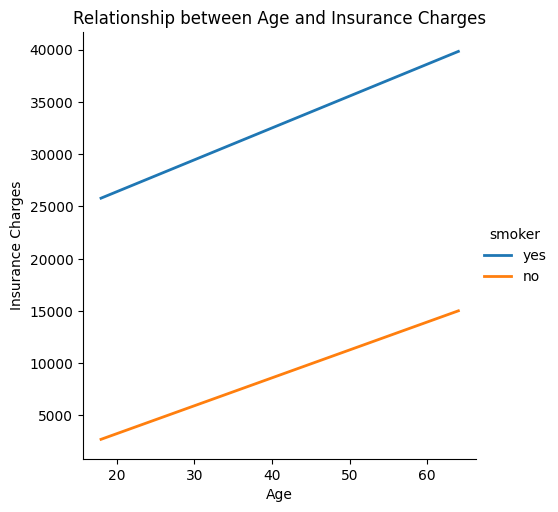

In [314]:
plt.figure(figsize=(12, 8))

# Scatter plot with hue='smoker'
sns.scatterplot(x='age', y='charges', data=df, hue='smoker')

# Plot regression lines for smokers and non-smokers
sns.lmplot(x='age', y='charges', data=df, hue='smoker', ci=None, scatter=False, line_kws={'lw': 2})

plt.title('Relationship between Age and Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.show()


/tmp/ipykernel_28288/235529439.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=df_, palette='Set3')


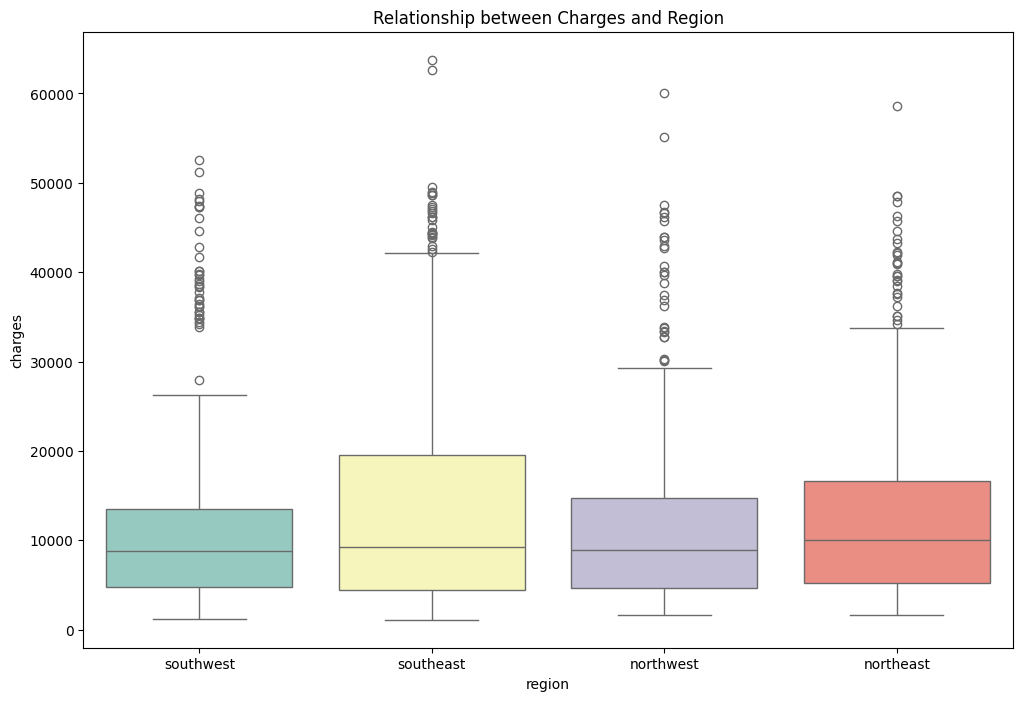

In [315]:
# FASE 3
# Assuming df_ is your DataFrame
# Replace this with your actual DataFrame

# Create a box plot for the relationship between 'charges' and 'region'
plt.figure(figsize=(12, 8))
sns.boxplot(x='region', y='charges', data=df_, palette='Set3')
plt.title('Relationship between Charges and Region')
plt.show()


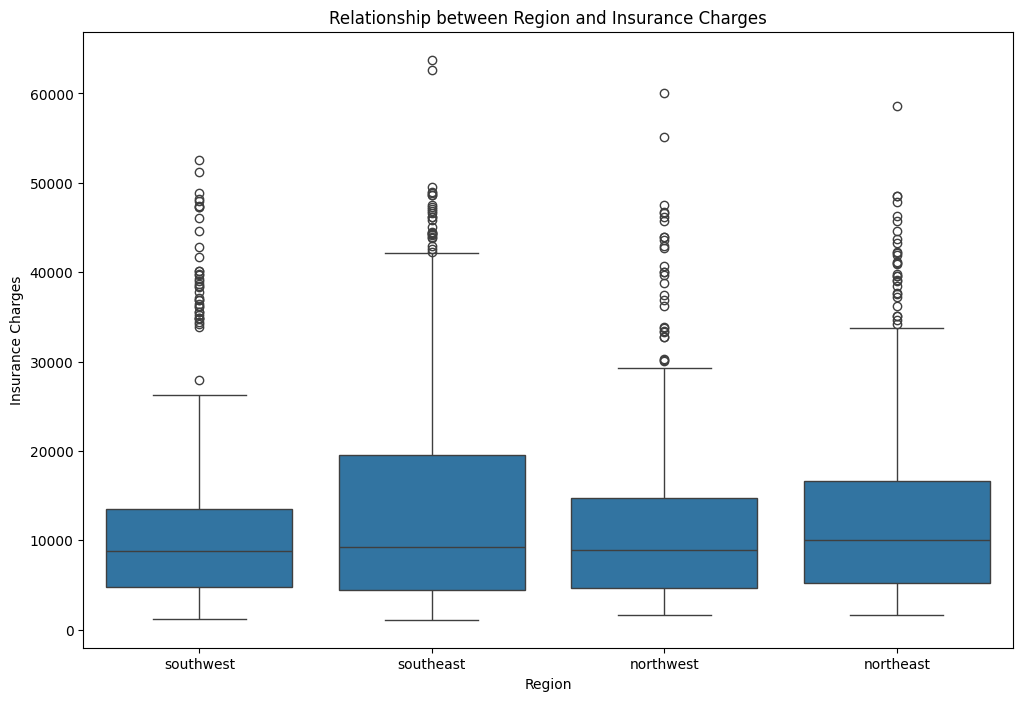

In [316]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Relationship between Region and Insurance Charges')
plt.xlabel('Region')
plt.ylabel('Insurance Charges')
plt.show()


In [317]:
# FASE 3
charges_stats = df_.groupby('region')['charges'].agg(['median', 'mean', 'std' ]).reset_index()
charges_stats

,region,median,mean,std
0,northeast,10057.652025,13406.384516,11255.803066
1,northwest,8965.795750,12417.575374,11072.276928
2,southeast,9294.131950,14735.411438,13971.098589
3,southwest,8798.593000,12346.937377,11557.179101


In [318]:
# Group by 'region' and calculate median, mean, and standard deviation
charges_stats = df.groupby('region')['charges'].agg(['median', 'mean', 'std']).reset_index()
charges_stats


,region,median,mean,std
0,northeast,10057.652025,13406.384516,11255.803066
1,northwest,8965.795750,12417.575374,11072.276928
2,southeast,9294.131950,14735.411438,13971.098589
3,southwest,8798.593000,12346.937377,11557.179101


/tmp/ipykernel_28288/1316473481.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='children', y='charges', data=df_, palette='Set2')


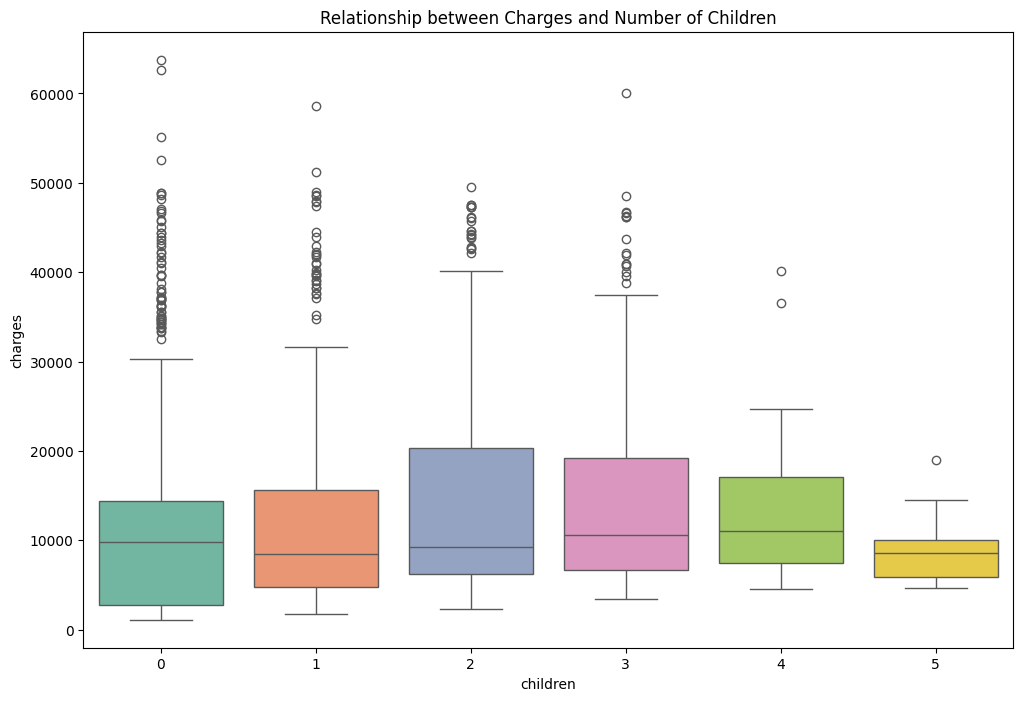

In [319]:
# FASE 3
plt.figure(figsize=(12, 8))
sns.boxplot(x='children', y='charges', data=df_, palette='Set2')
plt.title('Relationship between Charges and Number of Children')
plt.show()

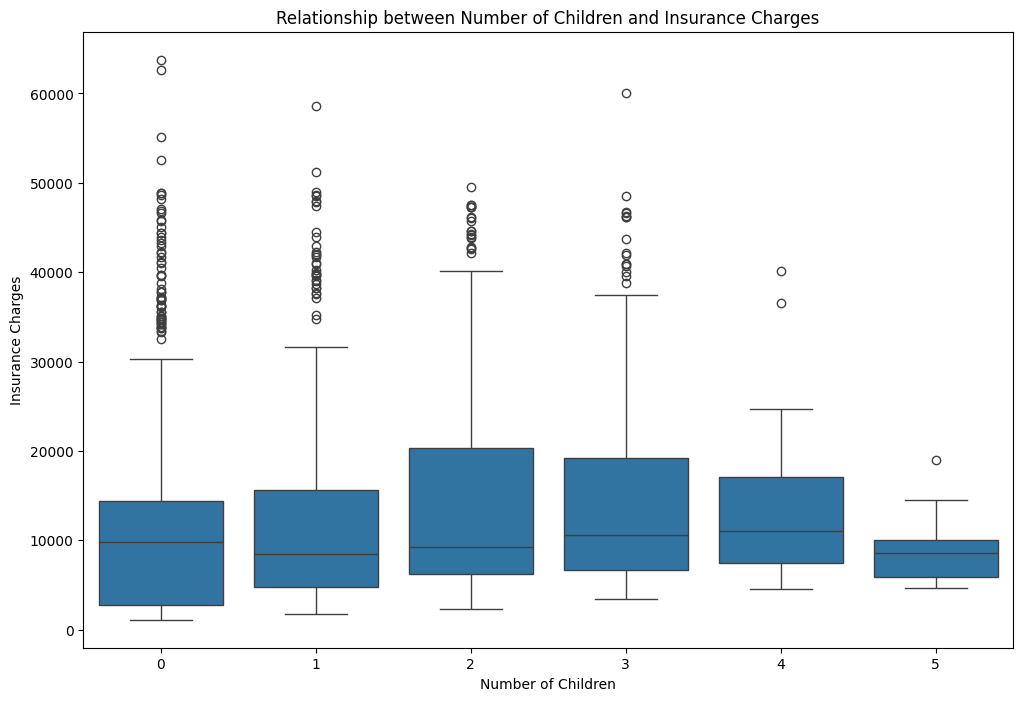

In [320]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='children', y='charges', data=df)
plt.title('Relationship between Number of Children and Insurance Charges')
plt.xlabel('Number of Children')
plt.ylabel('Insurance Charges')
plt.show()


In [321]:
# FASE 3
children_stats = df_.groupby('children')['charges'].agg(['median', 'std', 'mean']).reset_index()
children_stats


,children,median,std,mean
0,0,9856.95190,12023.293942,12365.975602
1,1,8483.87015,11823.631451,12731.171832
2,2,9264.97915,12891.368347,15073.563734
3,3,10600.54830,12330.869484,15355.318367
4,4,11033.66170,9139.223321,13850.656311
5,5,8589.56505,3808.435525,8786.035247


In [322]:
# Group by 'region' and calculate median, mean, and standard deviation of the number of children
children_stats = df.groupby('children')['charges'].agg(['median', 'mean', 'std']).reset_index()

# Display the resulting DataFrame
children_stats


,children,median,mean,std
0,0,9856.95190,12365.975602,12023.293942
1,1,8483.87015,12731.171832,11823.631451
2,2,9264.97915,15073.563734,12891.368347
3,3,10600.54830,15355.318367,12330.869484
4,4,11033.66170,13850.656311,9139.223321
5,5,8589.56505,8786.035247,3808.435525


#### Categorização da Idade

In [323]:
age_bins = [0, 21, 60, float('inf')]
age_labels = ['Children', 'Adults', 'Seniors']

# Create a new column 'age_group' based on age ranges
df_['age_group'] = pd.cut(df_['age'], bins=age_bins, labels=age_labels, right=False)



# Display the updated DataFrame
print(df_)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

        bmi_category age_group  
0         Overweight  Children  
1            Obesity  Children  
2            Obesity    Adults  
3     Healthy Weight    Adu

In [324]:
# Function to categorize age into groups
def categorize_age(age):
    if age < 21:
        return 'Children'
    elif 21 <= age < 60:
        return 'Adults'
    else:
        return 'Seniors'

# Apply the function to create a new 'age_group' column
df['age_group'] = df['age'].apply(categorize_age)


#### Relação Idade e Custos do Seguro


/tmp/ipykernel_28288/2060143884.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='charges', data=df_, palette='viridis')


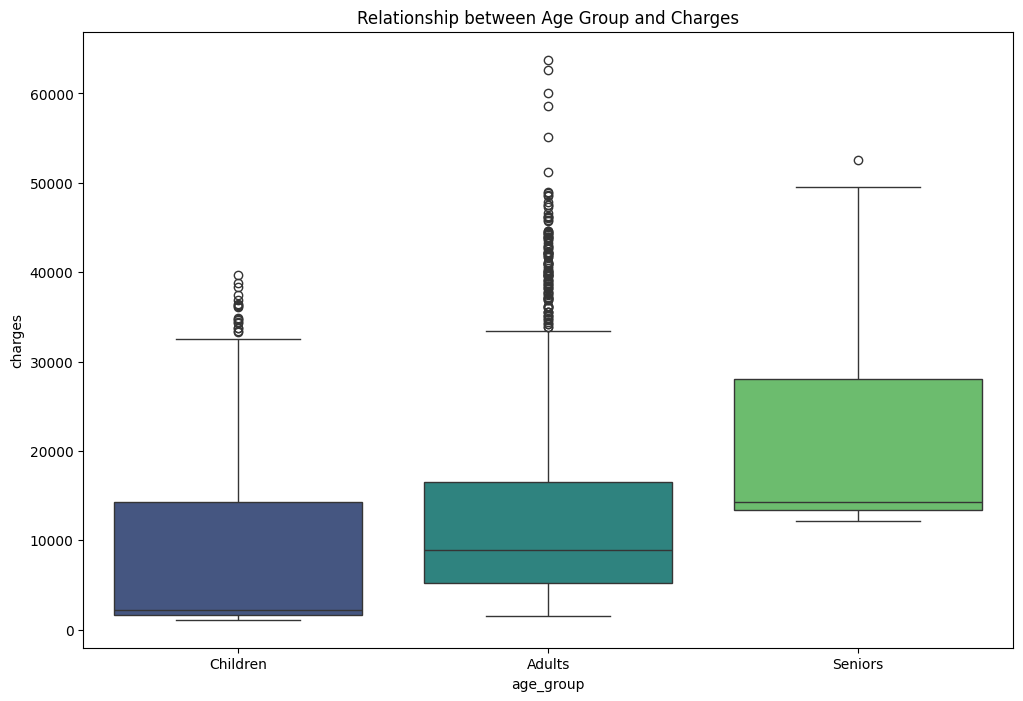

In [325]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='age_group', y='charges', data=df_, palette='viridis')
plt.title('Relationship between Age Group and Charges')
plt.show()

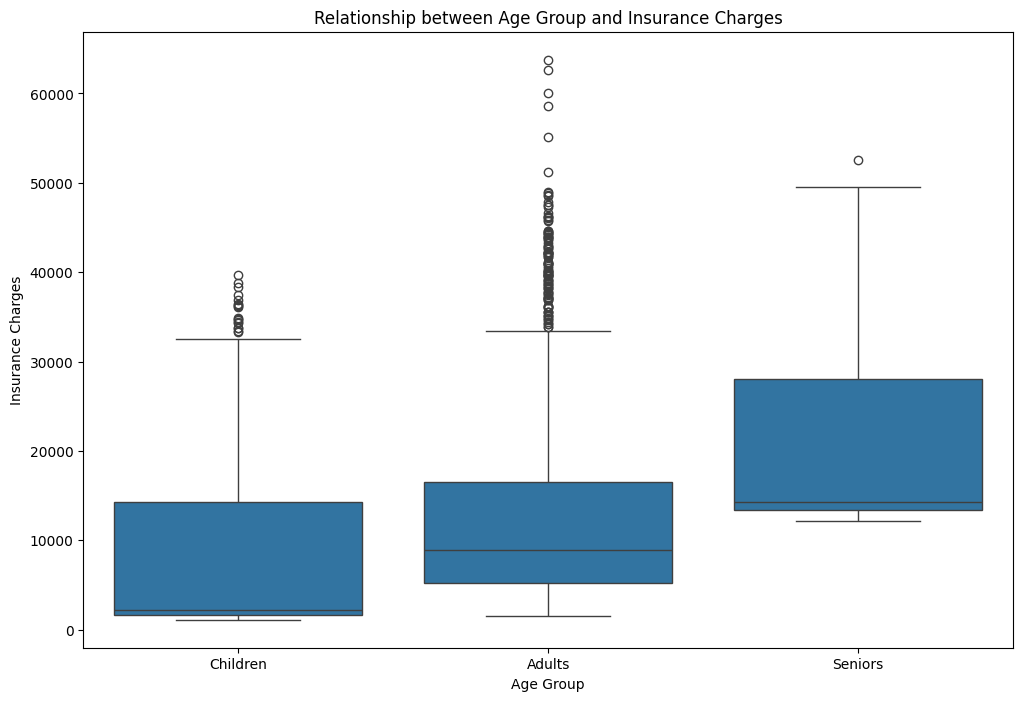

In [326]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='age_group', y='charges', data=df, order=['Children', 'Adults', 'Seniors'])
plt.title('Relationship between Age Group and Insurance Charges')
plt.xlabel('Age Group')
plt.ylabel('Insurance Charges')
plt.show()

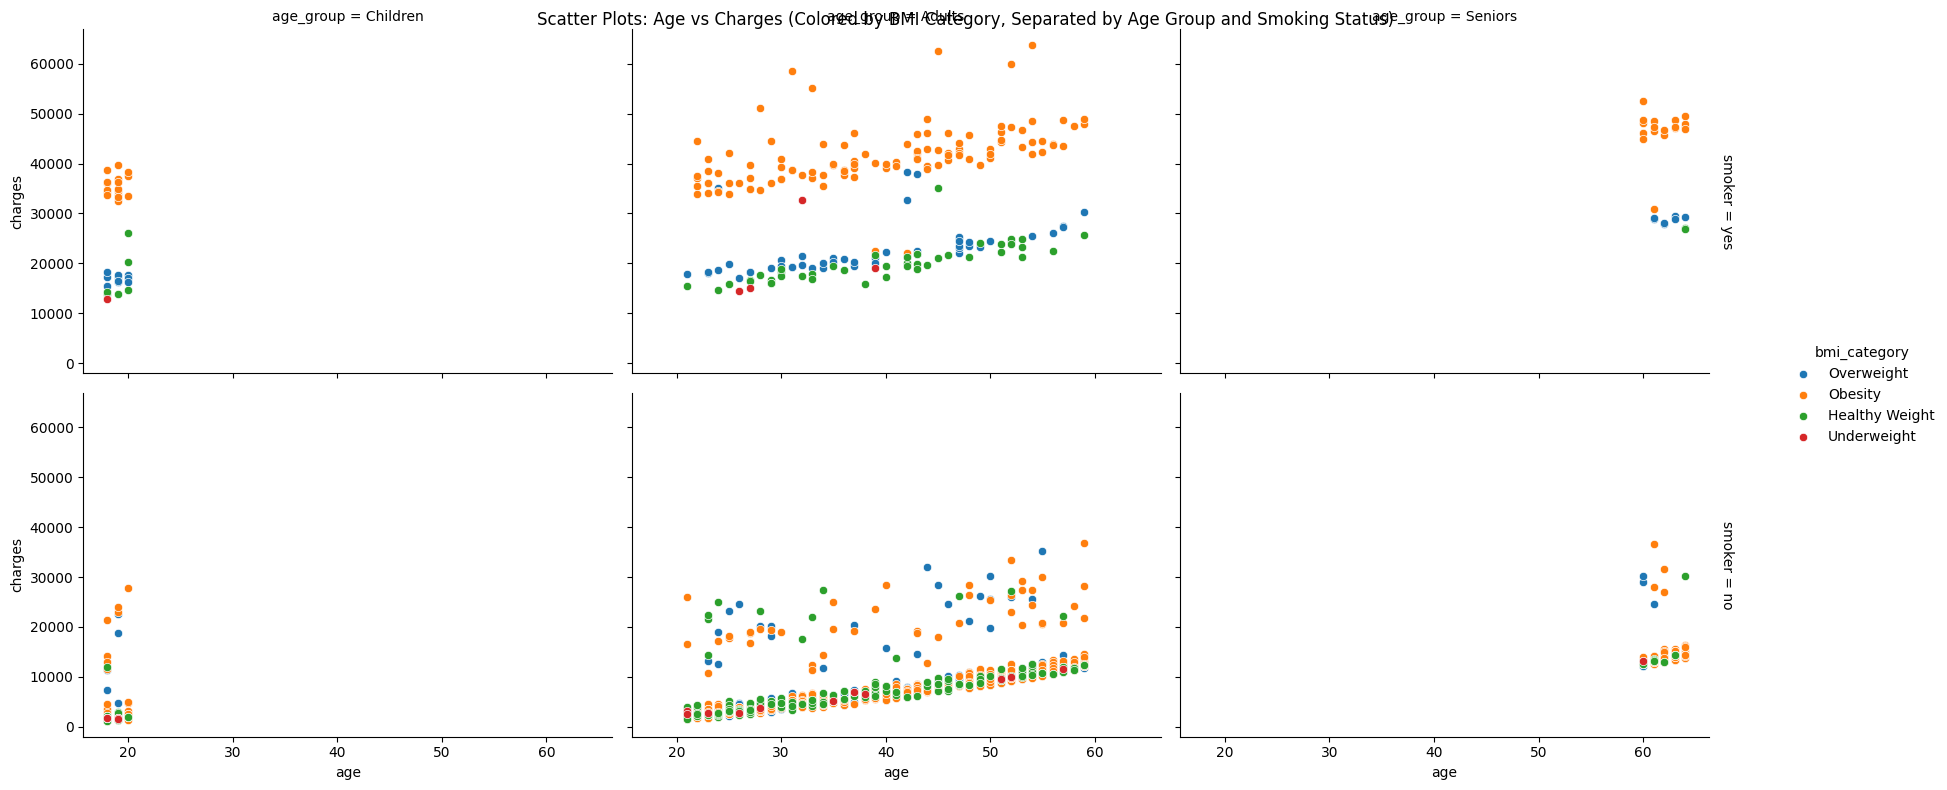

In [327]:
# FASE 3
g = sns.FacetGrid(df_, col='age_group', row='smoker', hue='bmi_category', height=4, aspect=1.5, margin_titles=True)
g.map(sns.scatterplot, 'age', 'charges')
g.add_legend()
plt.suptitle('Scatter Plots: Age vs Charges (Colored by BMI Category, Separated by Age Group and Smoking Status)')
plt.show()

<Figure size 1400x1000 with 0 Axes>

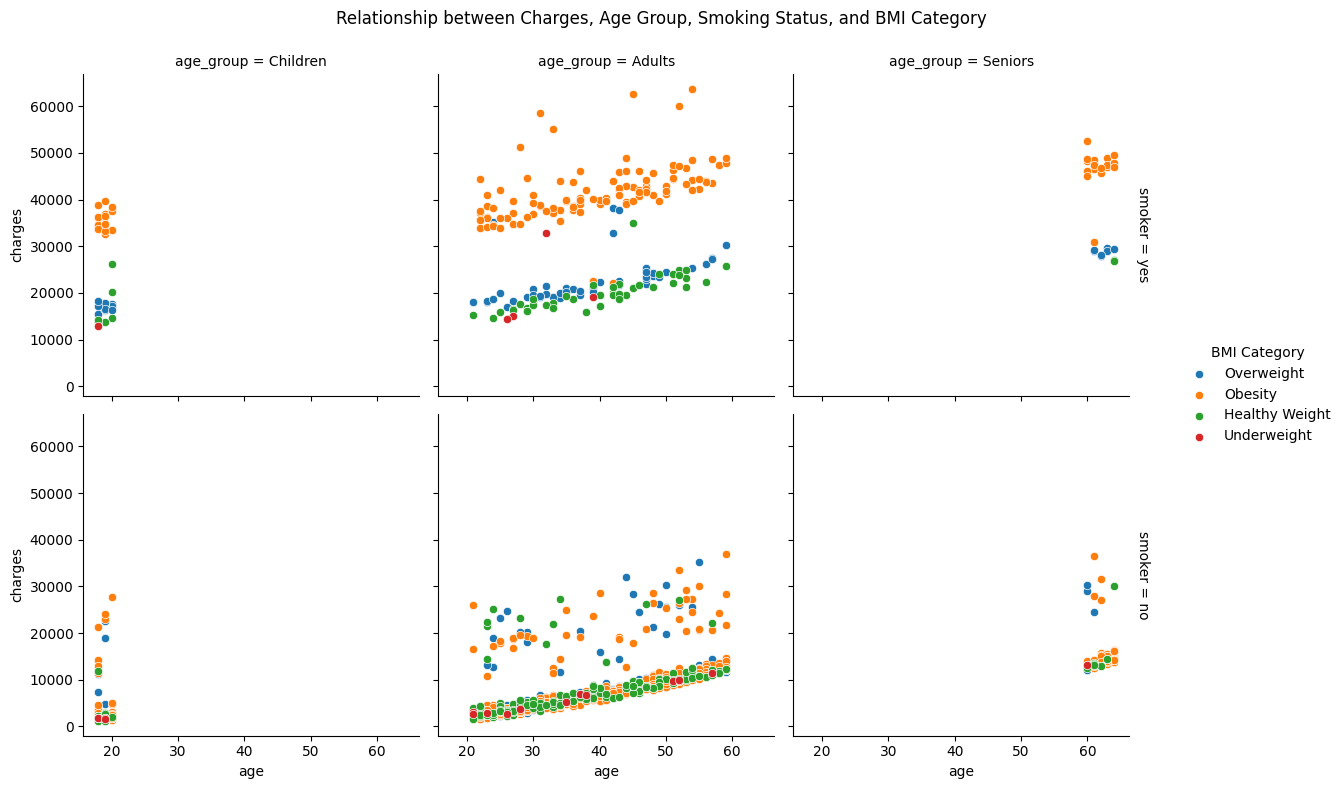

In [328]:
plt.figure(figsize=(14, 10))
g = sns.FacetGrid(df, col='age_group', row='smoker', hue='bmi_category', margin_titles=True, height=4)
g.map(sns.scatterplot, 'age', 'charges')
g.add_legend(title='BMI Category')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between Charges, Age Group, Smoking Status, and BMI Category')
plt.show()


<Figure size 2500x2000 with 0 Axes>

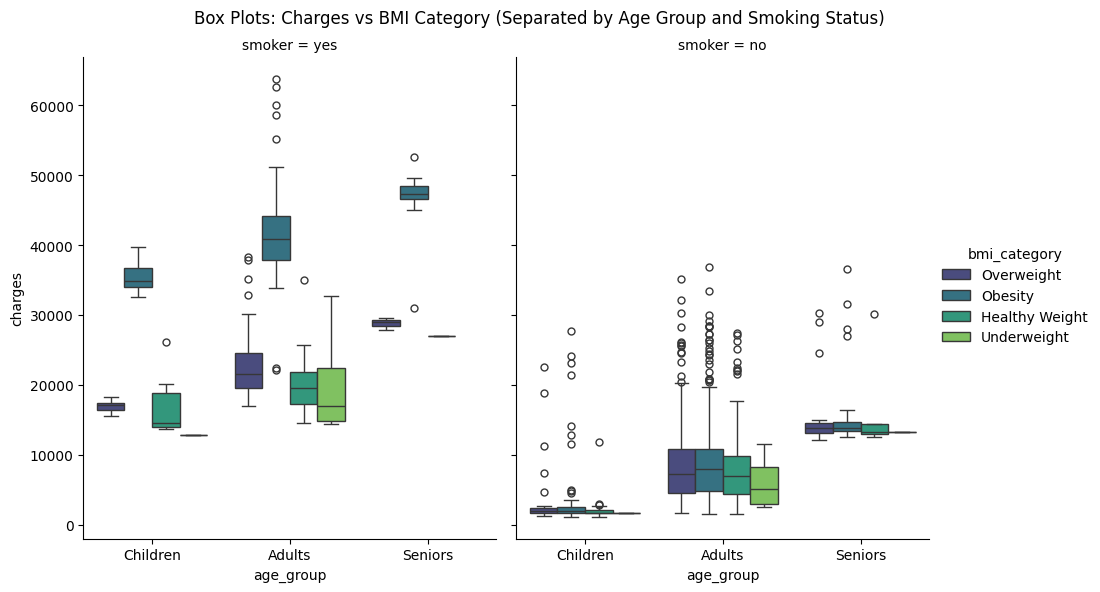

In [329]:
plt.figure(figsize=(25, 20))
g = sns.catplot(x='age_group', y='charges', hue='bmi_category', col='smoker', data=df_, kind='box', palette='viridis', height=6, aspect=0.8)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Box Plots: Charges vs BMI Category (Separated by Age Group and Smoking Status)')
plt.show()

<Figure size 1600x1000 with 0 Axes>

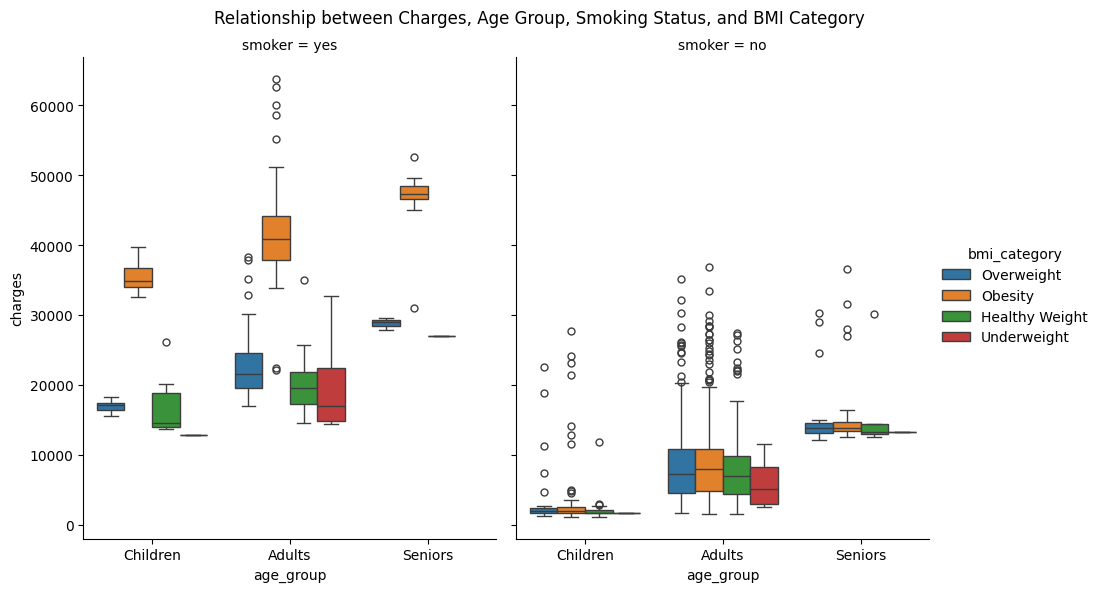

In [330]:
plt.figure(figsize=(16, 10))
sns.catplot(x='age_group', y='charges', hue='bmi_category', col='smoker', data=df, kind='box', height=6, aspect=0.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('Relationship between Charges, Age Group, Smoking Status, and BMI Category')
plt.show()

## **3. Data preparation (Preparação dos dados)**

#### Remoção de linhas com valores nulos 

In [331]:
# FASE 3
df_.dropna(inplace=True)
df_.isnull().sum()

age             0
sex             0
bmi             0
children        0
smoker          0
region          0
charges         0
bmi_category    0
age_group       0
dtype: int64

In [332]:
df.dropna(inplace=True)
print(df.isnull().sum())

age             0
sex             0
bmi             0
children        0
smoker          0
region          0
charges         0
bmi_category    0
age_group       0
dtype: int64


#### One-Hot Encoding para region, smoker e sex

In [333]:
columns_to_encode = ['region', 'smoker', 'sex']

# Perform one-hot encoding
df_prepared_ = pd.get_dummies(df_, columns=['region', 'smoker', 'sex'], drop_first=True)

df_prepared_.head()

,age,bmi,children,charges,bmi_category,age_group,region_northwest,region_southeast,region_southwest,smoker_yes,sex_male
0,19,27.900,0,16884.92400,Overweight,Children,False,False,True,True,False
1,18,33.770,1,1725.55230,Obesity,Children,False,True,False,False,True
2,28,33.000,3,4449.46200,Obesity,Adults,False,True,False,False,True
3,33,22.705,0,21984.47061,Healthy Weight,Adults,True,False,False,False,True
4,32,28.880,0,3866.85520,Overweight,Adults,True,False,False,False,True


In [334]:
# Codificação One-Hot para 'region' e 'smoker'
df_prepared = pd.get_dummies(df, columns=['region', 'smoker', 'sex'], drop_first=True)
df_prepared.head()


,age,bmi,children,charges,bmi_category,age_group,region_northwest,region_southeast,region_southwest,smoker_yes,sex_male
0,19,27.900,0,16884.92400,Overweight,Children,False,False,True,True,False
1,18,33.770,1,1725.55230,Obesity,Children,False,True,False,False,True
2,28,33.000,3,4449.46200,Obesity,Adults,False,True,False,False,True
3,33,22.705,0,21984.47061,Healthy Weight,Adults,True,False,False,False,True
4,32,28.880,0,3866.85520,Overweight,Adults,True,False,False,False,True


#### Normalização/Padronização

In [335]:
# FASE 3
# Specify the columns for scaling
columns_to_scale_standard = ['age', 'bmi']
columns_to_scale_minmax = ['children']

# Initialize the StandardScaler for specified columns
scaler_standard = StandardScaler()
df_prepared_[columns_to_scale_standard] = scaler_standard.fit_transform(df_prepared_[columns_to_scale_standard])

# Initialize the MinMaxScaler for specified columns
scaler_minmax = MinMaxScaler()
df_prepared_[columns_to_scale_minmax] = scaler_minmax.fit_transform(df_prepared_[columns_to_scale_minmax])


df_prepared_.describe()

,age,bmi,children,charges
count,1.338000e+03,1.338000e+03,1338.000000,1338.000000
mean,-1.805565e-16,-2.124194e-16,0.218984,13270.422265
std,1.000374e+00,1.000374e+00,0.241099,12110.011237
min,-1.509965e+00,-2.412011e+00,0.000000,1121.873900
25%,-8.691547e-01,-7.164063e-01,0.000000,4740.287150
50%,-1.474046e-02,-4.320880e-02,0.200000,9382.033000
75%,8.396738e-01,6.611572e-01,0.400000,16639.912515
max,1.765289e+00,3.685522e+00,1.000000,63770.428010


In [336]:
# Escala Min-Max para 'children'
scaler_minmax = MinMaxScaler()
df_prepared['children'] = scaler_minmax.fit_transform(df_prepared[['children']])

# Padronização para 'age' e 'bmi'
scaler_standard = StandardScaler()
df_prepared[['age', 'bmi']] = scaler_standard.fit_transform(df_prepared[['age', 'bmi']])

# Verificação final
df_prepared.describe()

,age,bmi,children,charges
count,1.338000e+03,1.338000e+03,1338.000000,1338.000000
mean,-1.805565e-16,-2.124194e-16,0.218984,13270.422265
std,1.000374e+00,1.000374e+00,0.241099,12110.011237
min,-1.509965e+00,-2.412011e+00,0.000000,1121.873900
25%,-8.691547e-01,-7.164063e-01,0.000000,4740.287150
50%,-1.474046e-02,-4.320880e-02,0.200000,9382.033000
75%,8.396738e-01,6.611572e-01,0.400000,16639.912515
max,1.765289e+00,3.685522e+00,1.000000,63770.428010


#### Seleção de atributos relevantes

In [337]:
# FASE 3

selected_columns = ['age', 'sex_male', 'bmi', 'children', 'charges', 'region_northwest', 'region_southeast', 'region_southwest', 'smoker_yes']

df_prepared_ = df_prepared_[selected_columns]
df_prepared_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   float64
 1   sex_male          1338 non-null   bool   
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   float64
 4   charges           1338 non-null   float64
 5   region_northwest  1338 non-null   bool   
 6   region_southeast  1338 non-null   bool   
 7   region_southwest  1338 non-null   bool   
 8   smoker_yes        1338 non-null   bool   
dtypes: bool(5), float64(4)
memory usage: 48.5 KB


In [338]:
df_prepared=df_prepared[['age', 'sex_male', 'bmi', 'children', 'charges','region_northwest', 'region_southeast', 'region_southwest','smoker_yes']]
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   float64
 1   sex_male          1338 non-null   bool   
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   float64
 4   charges           1338 non-null   float64
 5   region_northwest  1338 non-null   bool   
 6   region_southeast  1338 non-null   bool   
 7   region_southwest  1338 non-null   bool   
 8   smoker_yes        1338 non-null   bool   
dtypes: bool(5), float64(4)
memory usage: 48.5 KB


## **4. Modeling (Modelagem)**

#### Divisão Teste, Treino e Validação


Os dados foram divididos de forma aleatória numa proporção de 60,20,20 entre treino, teste e validação respectivamente, de modo a abranger uma alta variedade de instancias em cada um dos conjuntos evitando a perda de algum subconjunto dos elementos devido a divisões tendenciosas ou com slices muito pequenos. 

In [339]:
# Specify the test_size for validation and test sets
test_size = 0.2

# Split into features (X) and target variable (y)
X_ = df_prepared_.drop('charges', axis=1)
y_ = df_prepared_['charges']

# Split into training (60%) and temporary set (40%)
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=test_size, random_state=42)

# Further split the temporary set into validation (20%) and test (20%)
X_train_, X_val_, y_train_, y_val_ = train_test_split(X_train_, y_train_, test_size=0.25, random_state=42)

# Display the shape of each set
print("Training set shape:", X_train_.shape[0], y_train_.shape[0])
print("Validation set shape:", X_val_.shape[0], y_val_.shape[0])
print("Test set shape:", X_test_.shape[0], y_test_.shape[0])

Training set shape: 802 802
Validation set shape: 268 268
Test set shape: 268 268


In [340]:
X = df_prepared[['age', 'sex_male', 'bmi', 'children', 'region_northwest', 'region_southeast', 'region_southwest', 'smoker_yes']]
y = df_prepared['charges']

# Divisão inicial em treinamento (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Divisão do conjunto de treinamento em treinamento (60%) e validação (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Verificação do tamanho dos conjuntos
print("Tamanho do conjunto de treinamento:", len(X_train))
print("Tamanho do conjunto de validação:", len(X_val))
print("Tamanho do conjunto de teste:", len(X_test))


Tamanho do conjunto de treinamento: 802
Tamanho do conjunto de validação: 268
Tamanho do conjunto de teste: 268


Para a fase de modelagem escolhemos os modelos de regressão:
- LinearRegression
- RandomForestRegressor
- MLPRegressor
- RidgeRegressor
- KNeighborsRegressor
- SupportVectorRegressor
- GradientBoostingRegressor


O uso de múltiplos modelos diferentes permite que analisemos o desempenho de cada um deles para os mesmos dados de treino, teste e validação, ao utilisarmos a disversas métricas que serão apresentadas na seção de Validação. Ao compararmos esses modelos somos capazes de identificar quais são mais adequados para a tarefa de regressão definida, de modo a encontrar qual apresenta melhor desempenho e qualidade de previsão.

In [341]:
# INÍCIO CÓDIGO MANUAL
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(),
    'MLPRegressor': MLPRegressor(random_state=42, max_iter=1000),
    'RidgeRegressor': Ridge(alpha=1.0),
    'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=5),
    'SupportVectorRegressor': SVR(kernel='linear', C=1.0, epsilon=0.2), 
    'GradientBoostingRegressor': GradientBoostingRegressor(max_depth=3 ,random_state=42)
}
# FIM CÓDIGO MANUAL

In [342]:
# Fase 3
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

class EvalModel_:
    def __init__(self, model, model_name, X, y, X_train, X_val, X_test, y_train, y_val, y_test):
        self.model = model
        self.model_name = model_name
        self.X = X
        self.y = y
        self.X_train = X_train
        self.X_val = X_val
        self.X_test = X_test
        self.y_train = y_train
        self.y_val = y_val
        self.y_test = y_test

    def fit(self):
        self.model.fit(self.X_train, self.y_train)

    def evaluate_validation(self):
        y_val_pred = self.model.predict(self.X_val)
        mae = mean_absolute_error(self.y_val, y_val_pred)
        mse = mean_squared_error(self.y_val, y_val_pred)
        rmse = mean_squared_error(self.y_val, y_val_pred, squared=False)
        r2 = r2_score(self.y_val, y_val_pred)
        return mae, mse, rmse, r2

    def evaluate_test(self):
        y_test_pred = self.model.predict(self.X_test)
        mae = mean_absolute_error(self.y_test, y_test_pred)
        mse = mean_squared_error(self.y_test, y_test_pred)
        rmse = mean_squared_error(self.y_test, y_test_pred, squared=False)
        r2 = r2_score(self.y_test, y_test_pred)
        return mae, mse, rmse, r2

    def print_evaluation(self):
        mae_val, mse_val, rmse_val, r2_val = self.evaluate_validation()
        mae_test, mse_test, rmse_test, r2_test = self.evaluate_test()

        print(f"Evaluation for {self.model_name}:")
        print("Validation Set:")
        print(f"MAE: {mae_val:.4f}")
        print(f"MSE: {mse_val:.4f}")
        print(f"RMSE: {rmse_val:.4f}")
        print(f"R2: {r2_val:.4f}")
        print("\nTest Set:")
        print(f"MAE: {mae_test:.4f}")
        print(f"MSE: {mse_test:.4f}")
        print(f"RMSE: {rmse_test:.4f}")
        print(f"R2: {r2_test:.4f}")

    def print_kfolds(self, num_folds=5):
        kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
        mae_scores = []
        mse_scores = []
        rmse_scores = []
        r2_scores = []

        for train_index, test_index in kf.split(self.X):
            X_train, X_test = self.X[train_index], self.X[test_index]
            y_train, y_test = self.y[train_index], self.y[test_index]

            self.model.fit(X_train, y_train)
            y_pred = self.model.predict(X_test)

            mae_scores.append(mean_absolute_error(y_test, y_pred))
            mse_scores.append(mean_squared_error(y_test, y_pred))
            rmse_scores.append(mean_squared_error(y_test, y_pred, squared=False))
            r2_scores.append(r2_score(y_test, y_pred))

        print(f"K-Fold Cross Validation Scores for {self.model_name} (K={num_folds}):")
        for i in range(num_folds):
            print(f"Fold {i + 1}:")
            print(f"MAE: {mae_scores[i]:.4f}")
            print(f"MSE: {mse_scores[i]:.4f}")
            print(f"RMSE: {rmse_scores[i]:.4f}")
            print(f"R2: {r2_scores[i]:.4f}")
            print("---")
        
        print("Mean Scores:")
        print(f"MAE: {sum(mae_scores) / num_folds:.4f}")
        print(f"MSE: {sum(mse_scores) / num_folds:.4f}")
        print(f"RMSE: {sum(rmse_scores) / num_folds:.4f}")
        print(f"R2: {sum(r2_scores) / num_folds:.4f}")

In [343]:
# INÍCIO CÓDIGO ALTERADO
class EvalModel:
    def __init__(self, model_name, model,X, y, X_train, X_val,X_test, y_train, y_val, y_test):
        self.model_name = model_name
        self.model = model
        self.X = X
        self.y = y
        self.X_train = X_train
        self.X_val = X_val
        self.X_test = X_test
        self.y_train = y_train
        self.y_val = y_val
        self.y_test = y_test
    def fit(self):
        self.model.fit(self.X_train, self.y_train)
        
    
    def evaluate_validation(self):
        self.y_pred = self.model.predict(self.X_val)
        self.mae_validation = mean_absolute_error(self.y_val, self.y_pred)
        self.mse_validation = mean_squared_error(self.y_val, self.y_pred)
        self.rmse_validation = np.sqrt(self.mse_validation)
        self.r2_validation = r2_score(self.y_val, self.y_pred)
        
    def evaluate_test(self):
        self.y_pred_test = self.model.predict(self.X_test)
        self.mae_test = mean_absolute_error(y_test, self.y_pred_test)
        self.mse_test = mean_squared_error(self.y_test, self.y_pred_test)
        self.rmse_test = np.sqrt(self.mse_test)
        self.r2_test = r2_score(self.y_test, self.y_pred_test)
        
    def print_evaluation(self):
        print(f"MODEL: {self.model_name}")
        print("Validation:")
        print(f"MAE (validation): {self.mae_validation}")
        print(f"MSE (validation): {self.mse_validation}")
        print(f"RMSE (validation): {self.rmse_validation}")
        print(f"R2 (validation): {self.r2_validation}")
        print("Test:")
        print(f"MAE (test): {self.mae_test}")
        print(f"MSE (test): {self.mse_test}")
        print(f"RMSE (test): {self.rmse_test}")
        print(f"R2 (test): {self.r2_test}")
        
    def print_kfolds(self):
        k_folds = 5  # You can adjust this based on your preference
        # Create a k-fold cross-validation object
        kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

        # Perform cross-validation and get scores
        neg_mse_scores = cross_val_score(self.model, self.X, self.y, cv=kf, scoring='neg_mean_squared_error')

        # Convert the negative mean squared error to positive (if needed)
        mse_scores = -neg_mse_scores
        
        rsquares = cross_val_score(self.model, self.X, self.y, cv=kf, scoring='r2')
        
        print(f"MODEL: {self.model_name}")
        print("KFolds: ")
        print(f"MSE: {mse_scores.mean()} +- {np.std(mse_scores)}")
        print(f"R2: {rsquares.mean()} +- {np.std(rsquares)}")
# FIM CÓDIGO ALTERADO

In [344]:
# INÍCIO CÓDIGO MANUAL
evaluators = {
    model_name: EvalModel(model_name, model,X, y, X_train, X_val, X_test, y_train, y_val, y_test) for model_name, model in models.items()
}
# FIM CÓDIGO MANUAL

In [345]:
# INÍCIO CÓDIGO MANUAL
for __, evaluator  in evaluators.items():
    evaluator.fit()
# FIM CÓDIGO MANUAL

/home/araju/anaconda3/envs/TP_4_MD/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## **5. Evaluation (Validação)**



**MAE (Mean Absolute Error)**

O MAE captura a magnitude média dos erros de previsão do modelo. Ele é interpretado como a distância média entre os valores reais e os valores previstos. Um MAE menor indica que o modelo está fazendo uma previsão mais precisa.

**MSE (Mean Squared Error)**

O MSE captura a magnitude média dos erros de previsão do modelo, ponderada pela sua distância dos valores reais. Ele é interpretado como a diferença média entre os valores reais e os valores previstos, ao quadrado. Um MSE menor indica que o modelo está fazendo uma previsão mais precisa.

**RMSE (Root Mean Squared Error)**

O RMSE é a raiz quadrada do MSE. Ele tem a mesma interpretação do MSE, mas é expresso em unidades da variável dependente. Um RMSE menor indica que o modelo está fazendo uma previsão mais precisa.

**R2 (Coeficiente de determinação)**

O R2 captura a proporção da variação nos valores reais da variável dependente que é explicada pela variação nos valores previstos pelo modelo. Um R2 maior indica que o modelo está explicando mais da variação nos valores reais da variável dependente.


A partir dos resultados de cada um dos modelos implementados calculamos nossas métricas para os conjuntos de validação e de teste, que se mantém constantes.

In [346]:
# INÍCIO CÓDIGO MANUAL
for __, evaluator  in evaluators.items():
    evaluator.evaluate_validation()
    evaluator.evaluate_test()
# FIM CÓDIGO MANUAL

In [347]:
# INÍCIO CÓDIGO MANUAL
evaluators['LinearRegression'].print_evaluation()
evaluators['LinearRegression'].print_kfolds()
# FIM CÓDIGO MANUAL

MODEL: LinearRegression
Validation:
MAE (validation): 4574.566188965426
MSE (validation): 45790675.23525156
RMSE (validation): 6766.880761122628
R2 (validation): 0.7282907846159228
Test:
MAE (test): 4166.858722573393
MSE (test): 33753730.19041824
RMSE (test): 5809.79605411569
R2 (test): 0.7825828922009141
MODEL: LinearRegression
KFolds: 
MSE: 36998683.9154736 +- 3128575.4360201196
R2: 0.7401956629640443 +- 0.05777785559236651


In [348]:
# INÍCIO CÓDIGO MANUAL
evaluators['RandomForestRegressor'].print_evaluation()
evaluators['RandomForestRegressor'].print_kfolds()
# FIM CÓDIGO MANUAL

MODEL: RandomForestRegressor
Validation:
MAE (validation): 2973.5567666614124
MSE (validation): 31418630.426829252
RMSE (validation): 5605.2324150590985
R2 (validation): 0.8135705276705738
Test:
MAE (test): 2522.780223036505
MSE (test): 20778134.41383471
RMSE (test): 4558.303896608333
R2 (test): 0.866162291864293
MODEL: RandomForestRegressor
KFolds: 
MSE: 24230142.452700064 +- 1969827.5973767713
R2: 0.8309247416168253 +- 0.028437531110838472


In [349]:
# INÍCIO CÓDIGO MANUAL
evaluators['MLPRegressor'].print_evaluation()
evaluators['MLPRegressor'].print_kfolds()
# FIM CÓDIGO MANUAL

MODEL: MLPRegressor
Validation:
MAE (validation): 8742.667114666205
MSE (validation): 196237040.809392
RMSE (validation): 14008.463185138904
R2 (validation): -0.164416382018441
Test:
MAE (test): 7992.699373893411
MSE (test): 168793172.77164704
RMSE (test): 12992.042671252548
R2 (test): -0.08724349081455296


/home/araju/anaconda3/envs/TP_4_MD/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/araju/anaconda3/envs/TP_4_MD/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/araju/anaconda3/envs/TP_4_MD/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/araju/anaconda3/envs/TP_4_MD/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
 

MODEL: MLPRegressor
KFolds: 
MSE: 120870723.61422841 +- 10481872.09506893
R2: 0.16891526746640154 +- 0.04645072446588904


/home/araju/anaconda3/envs/TP_4_MD/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [350]:
# INÍCIO CÓDIGO MANUAL
evaluators['RidgeRegressor'].print_evaluation()
evaluators['RidgeRegressor'].print_kfolds()
# FIM CÓDIGO MANUAL

MODEL: RidgeRegressor
Validation:
MAE (validation): 4590.267590037545
MSE (validation): 45893195.23449256
RMSE (validation): 6774.451655631809
R2 (validation): 0.7276824592655793
Test:
MAE (test): 4182.30610463215
MSE (test): 33846731.033842295
RMSE (test): 5817.794344409425
R2 (test): 0.7819838480571688
MODEL: RidgeRegressor
KFolds: 
MSE: 36999658.26601936 +- 3069272.364884347
R2: 0.7402671958158755 +- 0.057139430330179666


In [351]:
# INÍCIO CÓDIGO MANUAL
evaluators['KNeighborsRegressor'].print_evaluation()
evaluators['KNeighborsRegressor'].print_kfolds()
# FIM CÓDIGO MANUAL

MODEL: KNeighborsRegressor
Validation:
MAE (validation): 4043.005551597015
MSE (validation): 49692948.323411755
RMSE (validation): 7049.322543579046
R2 (validation): 0.7051357742660829
Test:
MAE (test): 3644.3520695485076
MSE (test): 41440256.20856906
RMSE (test): 6437.410675773999
R2 (test): 0.7330718530813571
MODEL: KNeighborsRegressor
KFolds: 
MSE: 34277626.35024081 +- 3861057.89013276
R2: 0.7635283153392246 +- 0.02822387603395776


In [352]:
# INÍCIO CÓDIGO MANUAL
evaluators['SupportVectorRegressor'].print_evaluation()
evaluators['SupportVectorRegressor'].print_kfolds()
# FIM CÓDIGO MANUAL

MODEL: SupportVectorRegressor
Validation:
MAE (validation): 8801.157925823685
MSE (validation): 189622827.62004176
RMSE (validation): 13770.360475312247
R2 (validation): -0.12516946838747822
Test:
MAE (test): 8342.137510547847
MSE (test): 164994243.30543625
RMSE (test): 12845.008497678631
R2 (test): -0.06277353586093026
MODEL: SupportVectorRegressor
KFolds: 
MSE: 158844724.28213578 +- 19881524.340300515
R2: -0.0857936171165464 +- 0.0263407813128644


In [353]:
# INÍCIO CÓDIGO MANUAL
evaluators['GradientBoostingRegressor'].print_evaluation()
evaluators['GradientBoostingRegressor'].print_kfolds()
# FIM CÓDIGO MANUAL

MODEL: GradientBoostingRegressor
Validation:
MAE (validation): 2881.61307105519
MSE (validation): 28957087.89132442
RMSE (validation): 5381.179042860814
R2 (validation): 0.8281766409790245
Test:
MAE (test): 2404.2364920847613
MSE (test): 19347524.326216206
RMSE (test): 4398.5820813321425
R2 (test): 0.8753772469487687
MODEL: GradientBoostingRegressor
KFolds: 
MSE: 20994831.518405277 +- 2928964.2142662215
R2: 0.8527384178257993 +- 0.03456905796527283


Analisando seus modelos de regressão:

Com base nas métricas de validação fornecidas, aqui está uma análise de seus modelos:

**MAE:**

Melhor: RandomForestRegressor (2928,96) e GradientBoostingRegressor (2881,61)
Pior: MLPRegressor (8742,67) e SupportVectorRegressor (8801,16)
Interpretação: MAE menor indica erros médios de previsão menores, sugerindo que esses modelos são melhores em capturar a magnitude geral das diferenças.

**MSE:**

Melhor: GradientBoostingRegressor (28957087,89)
Pior: MLPRegressor (196237040,81) e SupportVectorRegressor (189622827,62)
Interpretação: Similar ao MAE, MSE menor significa erros de previsão gerais menores, mas ponderados por erros maiores tendo um impacto maior.

**RMSE:**

Melhor: RandomForestRegressor (5547,68) e GradientBoostingRegressor (5381,18)
Pior: MLPRegressor (14008,46) e SupportVectorRegressor (13770,36)
Interpretação: Similar ao MAE e MSE, mas expressa erros nas unidades originais da sua variável-alvo, oferecendo uma compreensão mais fácil das discrepâncias de previsão reais.

**R²:**

Melhor: GradientBoostingRegressor (0,8282) e RandomForestRegressor (0,8174)
Pior: MLPRegressor (-0,1644) e SupportVectorRegressor (-0,1252)
Interpretação: R² mais alto indica uma proporção maior da variância da variável-alvo explicada pelo modelo. Valores acima de 0,7 são geralmente considerados bons, enquanto valores negativos sugerem que o modelo tem desempenho pior do que simplesmente prever a média da variável-alvo.

#### Conclusão

GradientBoostingRegressor e RandomForestRegressor parecem ser os melhores desempenhos em todas as métricas, sugerindo que capturam as relações subjacentes em seus dados de forma eficaz.

MLPRegressor e SupportVectorRegressor tiveram um desempenho ruim, indicando que eles podem não ser adequados para este problema específico.

LinearRegression e RidgeRegressor obtiveram resultados moderados, potencialmente sugerindo espaço para melhorias por meio de outros tipos de modelos ou ajuste de hiperparâmetros.

### Importância das features

Uma análise importante que podemos realizar além da criação de um modelo de regressão é a análise do impacto de cada um dos atributos presentes no dataset na previsão dos gastos com seguro, para isso utilizamos as informações do modelo de Gradient Boosting Regressor, uma vez que ele apresentou os melhores resultados, e visualizamos o impacto de cada feature

In [354]:
# FASE 3
feature_importances = models['GradientBoostingRegressor'].feature_importances_

# Get the names of the features
feature_names = list(X_train.columns)  # Replace with your actual feature names

# Sort features by importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
feature_importance_df

,Feature,Importance
7,smoker_yes,0.663965
2,bmi,0.196802
0,age,0.124147
3,children,0.010725
4,region_northwest,0.001521
1,sex_male,0.001203
6,region_southwest,0.001046
5,region_southeast,0.000592


In [355]:
importances = models['GradientBoostingRegressor'].feature_importances_

# Create a DataFrame to associate importances with feature names
feature_importance_gb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})
# Sort features by importance in descending order
feature_importance_gb = feature_importance_gb.sort_values(by='Importance', ascending=False)
feature_importance_gb

,Feature,Importance
7,smoker_yes,0.663965
2,bmi,0.196802
0,age,0.124147
3,children,0.010725
4,region_northwest,0.001521
1,sex_male,0.001203
6,region_southwest,0.001046
5,region_southeast,0.000592


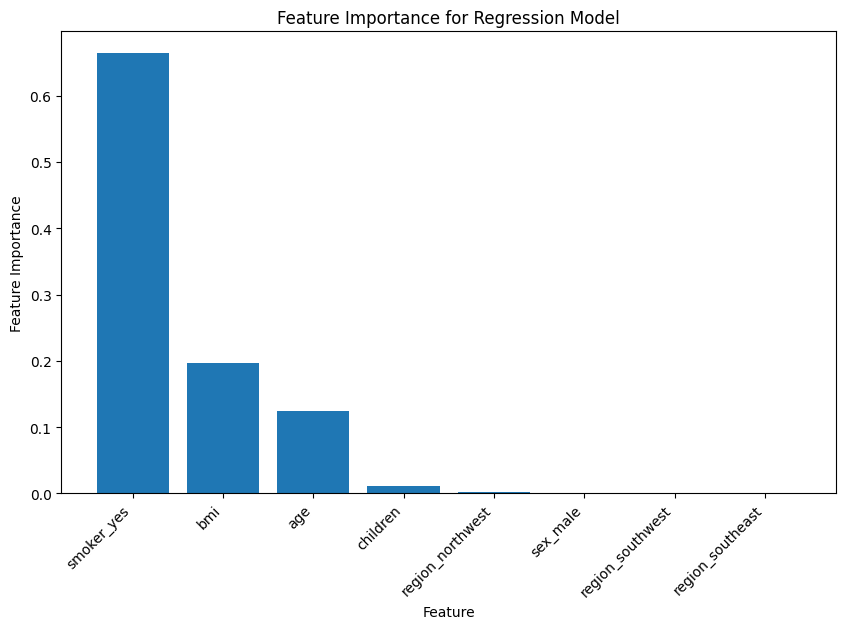

In [356]:
# FASE 3
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Regression Model')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

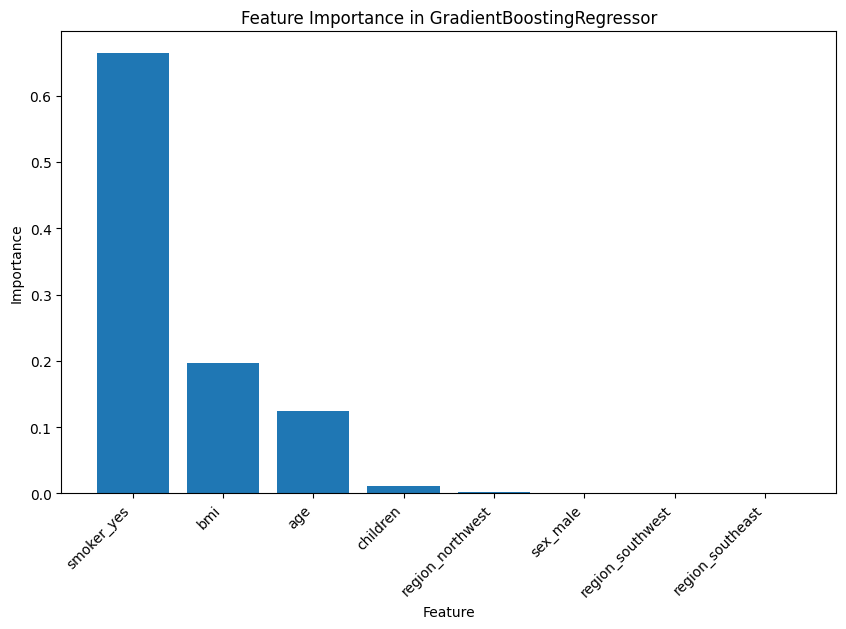

In [357]:
# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_gb['Feature'], feature_importance_gb['Importance'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in GradientBoostingRegressor')
plt.show()

A análise dos modelos de regressão para o preço do seguro de vida de moradores dos Estados Unidos mostrou que os atributos mais importantes são:

Ser fumante ou não: Os modelos com melhor desempenho foram aqueles que consideraram o histórico de tabagismo dos candidatos. Isso sugere que o tabagismo é o fator mais importante para determinar o preço do seguro de vida.

Índice de massa corporal (IMC): Modelos que consideraram o IMC também tiveram um desempenho superior. Isso sugere que pessoas com IMC alto têm um risco maior de desenvolver doenças graves, o que aumenta o custo do seguro de vida.

Idade: Modelos que consideraram a idade dos candidatos também tiveram um desempenho superior. Isso sugere que pessoas mais velhas têm um risco maior de morrer, o que aumenta o custo do seguro de vida.

Os atributos sexo e região tiveram um impacto muito menor no preço do seguro de vida. Isso sugere que as empresas de seguro de vida estão mais preocupadas com os fatores que estão diretamente ligados à saúde do beneficiário.


Esses resultados podem ser úteis para empresas de seguro de vida na hora de determinar o preço do seguro. As empresas podem considerar o uso desses atributos para melhorar a precisão de suas previsões.